In [1]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
import cv2
import statistics
import skimage as ski
from skimage.morphology import square,disk
from scipy import signal
from scipy import stats

In [2]:
files = os.listdir('/eos/experiment/awake/event_data/2024/10/08')

f = h5py.File('/eos/experiment/awake/event_data/2024/10/08/'+files[248],'r')

In [3]:
data = f['AwakeEventData'][f'TCC4.SPECTRO1.DigiCam']['ExtractionImage']['image2D'][0:121,0:152]

In [6]:
print(data)

[[12  2 26 ...  1 29  5]
 [ 9  8 18 ...  0  8 19]
 [ 0 12  2 ... 22  0 26]
 ...
 [ 0  6  0 ...  2  8 82]
 [45  0  8 ...  0 29  3]
 [13 12  4 ... 10 12  2]]


In [7]:
test_data = data.ravel()

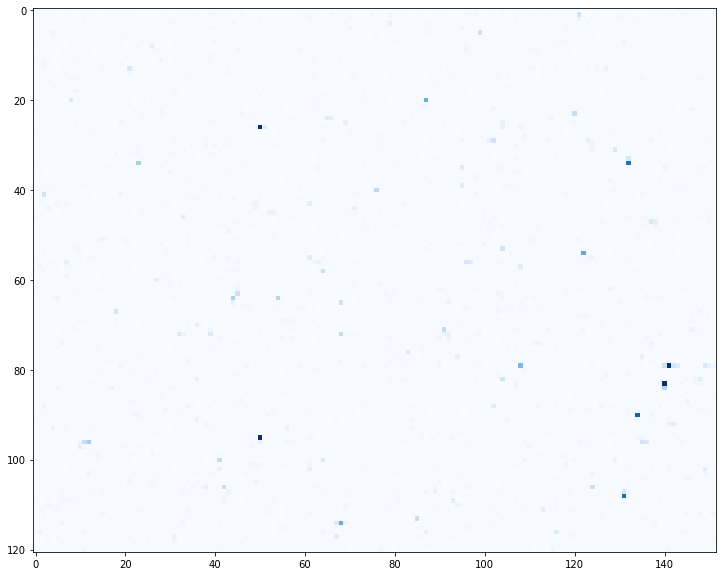

In [8]:
plt.figure(figsize=(15,10))
plt.imshow(data,vmax=4095,cmap='Blues')

In [9]:
statistics.median(test_data)

7.0

In [10]:
data[:, :] = 7

In [9]:
def test_median_filter(index1,index2):
    
    data = f['AwakeEventData'][f'TCC4.SPECTRO1.DigiCam']['ExtractionImage']['image2D'][0:index1,0:index2]
    
    unravel = data.ravel()
    med = statistics.median(unravel)
    
    data[:, :] = med
    data_before = f['AwakeEventData'][f'TCC4.SPECTRO1.DigiCam']['ExtractionImage']['image2D'][0:index1,0:index2]

    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 5))

    ax1.imshow(data_before,vmax=4095,cmap='Blues')
    ax2.imshow(data,vmax=4095,cmap='Blues')
    
    ax1.set_title('Before Median Filtering',fontsize=15)
    ax2.set_title('After Median Filtering',fontsize=15)
    
    return data

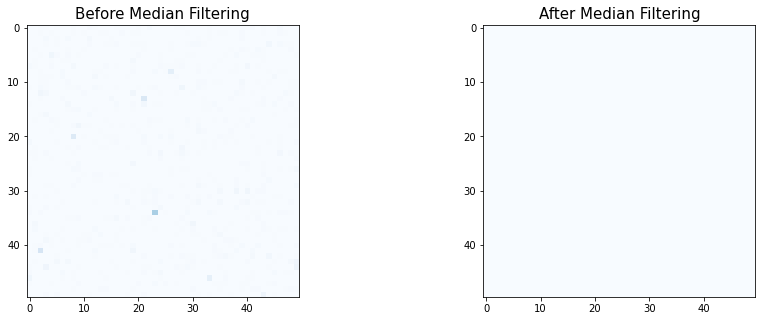

In [10]:
test_data = test_median_filter(50,50)

In [11]:
def median_filter(index1,index2):
    
    data = f['AwakeEventData'][f'TCC4.SPECTRO1.DigiCam']['ExtractionImage']['image2D'][0:index1,0:index2]
    
    unravel = data.ravel()
    med = statistics.median(unravel)
    
    data[:, :] = med
    
    return data

In [12]:
index_list_vert = np.arange(0,1216,152)
index_list_horz = np.arange(0,1936,121)
print(index_list_horz)

[   0  121  242  363  484  605  726  847  968 1089 1210 1331 1452 1573
 1694 1815]


Text(0.5, 1.0, 'After Median Filtering')

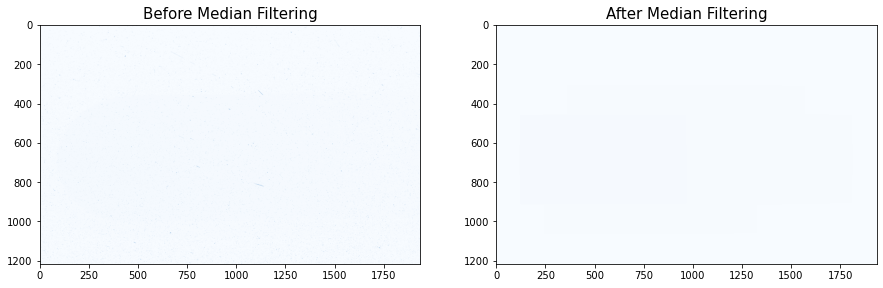

In [13]:
before_filtering = f['AwakeEventData'][f'TCC4.SPECTRO1.DigiCam']['ExtractionImage']['image2D'][:]
data = f['AwakeEventData'][f'TCC4.SPECTRO1.DigiCam']['ExtractionImage']['image2D'][:]

for j in index_list_vert:
    for i in index_list_horz:
        box = f['AwakeEventData'][f'TCC4.SPECTRO1.DigiCam']['ExtractionImage']['image2D'][j:j+152,i:i+121]
        unravel = box.ravel()
        med = statistics.median(unravel)
    
        data[j:j+152,i:i+121] = med
        
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.imshow(before_filtering,vmax=4095,cmap='Blues')
ax2.imshow(data,vmax=4095,cmap='Blues')
    
ax1.set_title('Before Median Filtering',fontsize=15)
ax2.set_title('After Median Filtering',fontsize=15)

In [4]:
index_list_vert2 = np.arange(0,1216,19)
index_list_horz2 = np.arange(0,1936,22)

Text(0.5, 1.0, 'After Median Filtering')

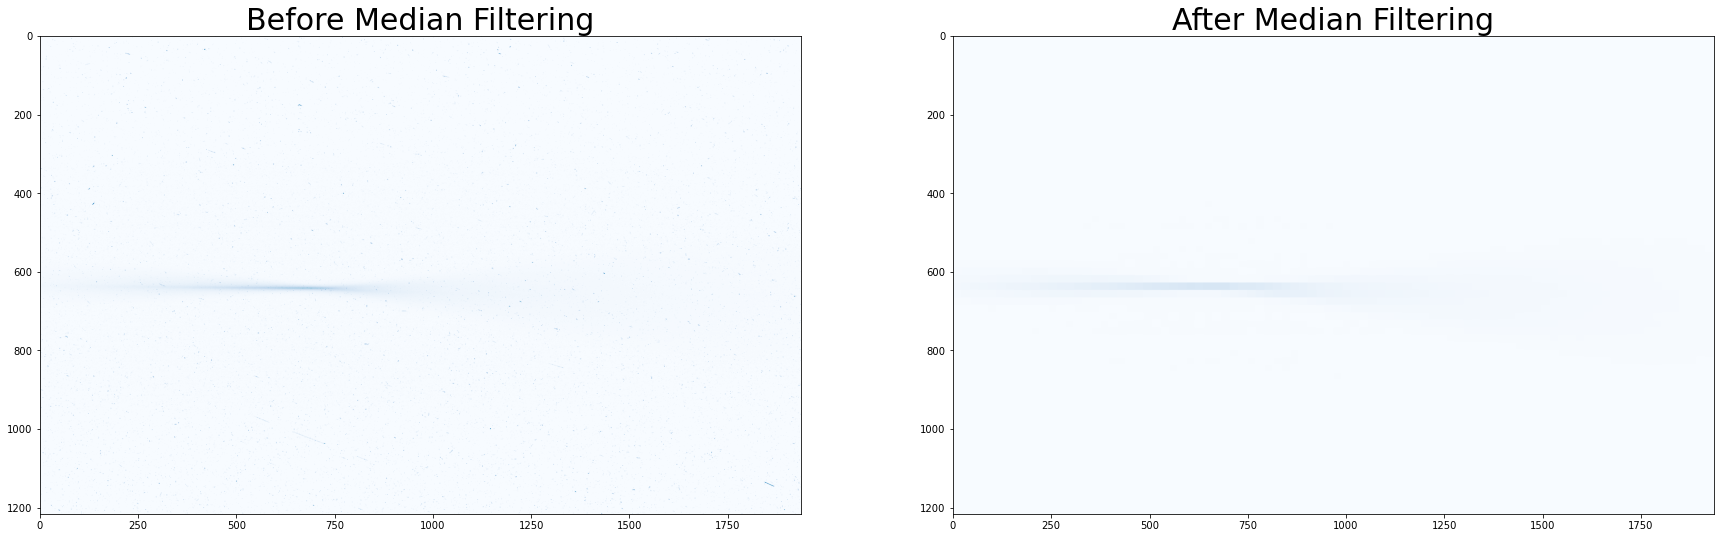

In [15]:
before_filtering = f['AwakeEventData'][f'TCC4.SPECTRO3.DigiCam']['ExtractionImage']['image2D'][:]
data = f['AwakeEventData'][f'TCC4.SPECTRO3.DigiCam']['ExtractionImage']['image2D'][:]

for j in index_list_vert2:
    for i in index_list_horz2:
        box = f['AwakeEventData'][f'TCC4.SPECTRO3.DigiCam']['ExtractionImage']['image2D'][j:j+19,i:i+22]
        unravel = box.ravel()
        med = statistics.median(unravel)
    
        data[j:j+19,i:i+22] = med
        
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30,10))

ax1.imshow(before_filtering,vmax=4095,cmap='Blues')
ax2.imshow(data,vmax=4095,cmap='Blues')
    
ax1.set_title('Before Median Filtering',fontsize=30)
ax2.set_title('After Median Filtering',fontsize=30)

In [5]:
def apply_filter(box_length,box_height):
    
    before_filtering = f['AwakeEventData'][f'TCC4.SPECTRO3.DigiCam']['ExtractionImage']['image2D'][:]
    data = f['AwakeEventData'][f'TCC4.SPECTRO3.DigiCam']['ExtractionImage']['image2D'][:]
    
    index_list_vert2 = np.arange(0,1216,box_height)
    index_list_horz2 = np.arange(0,1936,box_length)

    for j in index_list_vert2:
        for i in index_list_horz2:
            box = f['AwakeEventData'][f'TCC4.SPECTRO3.DigiCam']['ExtractionImage']['image2D'][j:j+box_height,i:i+box_length]
            unravel = box.ravel()
            med = statistics.median(unravel)
    
            data[j:j+box_height,i:i+box_length] = med
        
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30,10))

    ax1.imshow(before_filtering,vmax=4095,cmap='Blues')
    ax2.imshow(data,vmax=4095,cmap='Blues')
    
    ax1.set_title('Before Median Filtering',fontsize=30)
    ax2.set_title('After Median Filtering',fontsize=30)
    
    return data

In [32]:
## factors of 1216 ; (2, 4, 8, 16, 19, 32, 38, 64, 76, 152, 304, 608)
## factors of 1936 ; (2, 4, 8, 11, 16, 22, 44, 88, 121, 176, 242, 484, 968)

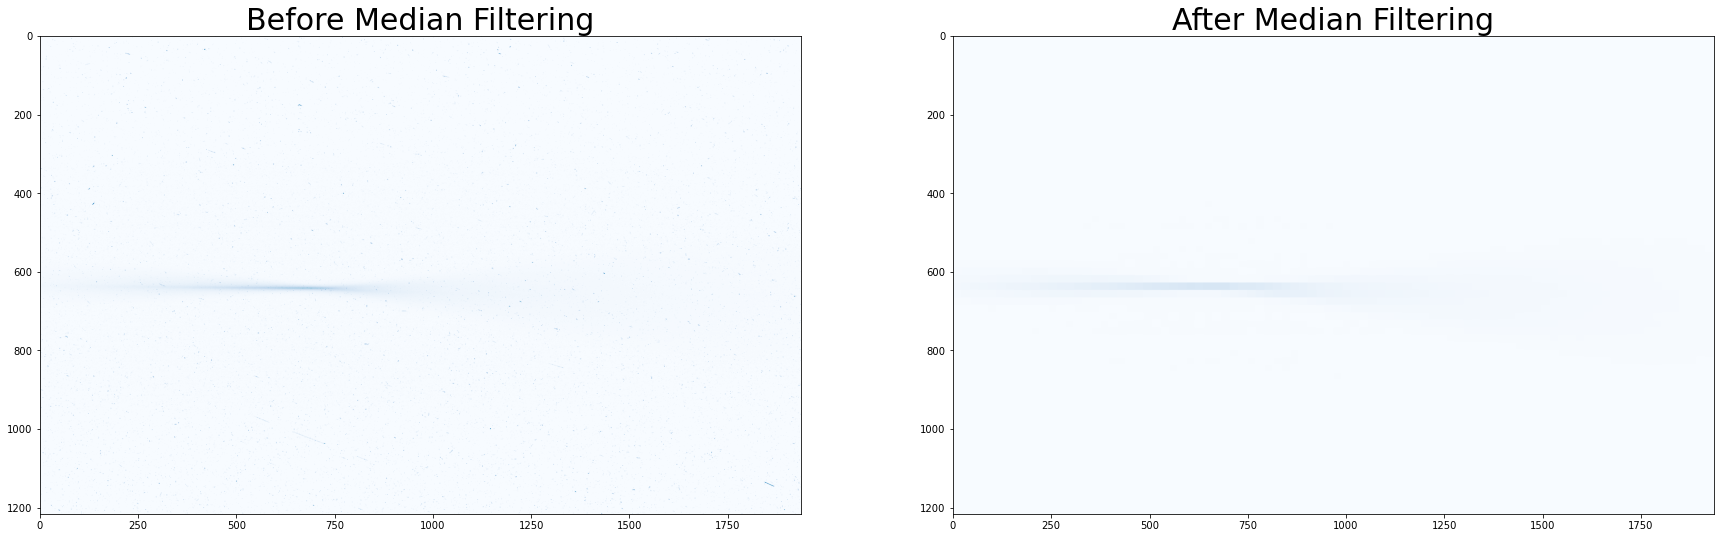

In [33]:
filtered_data = apply_filter(22,19)

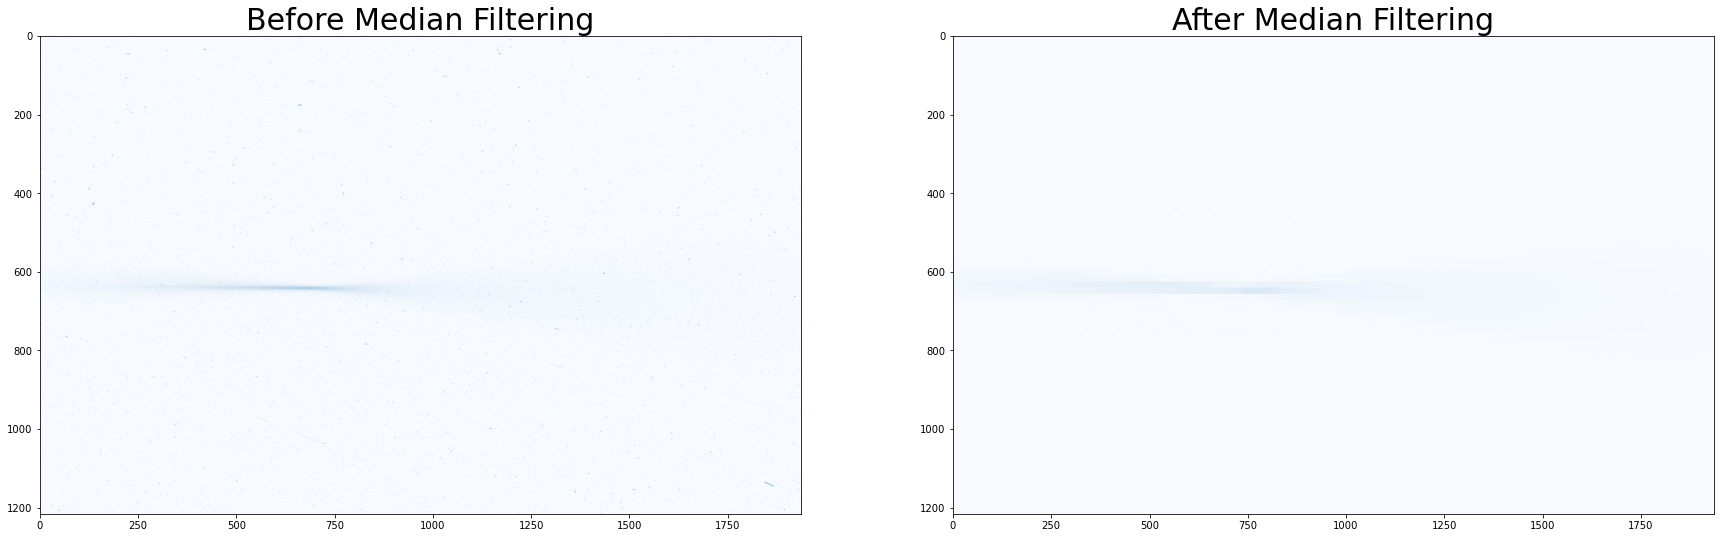

In [34]:
filtered_data1 = apply_filter(16,16)

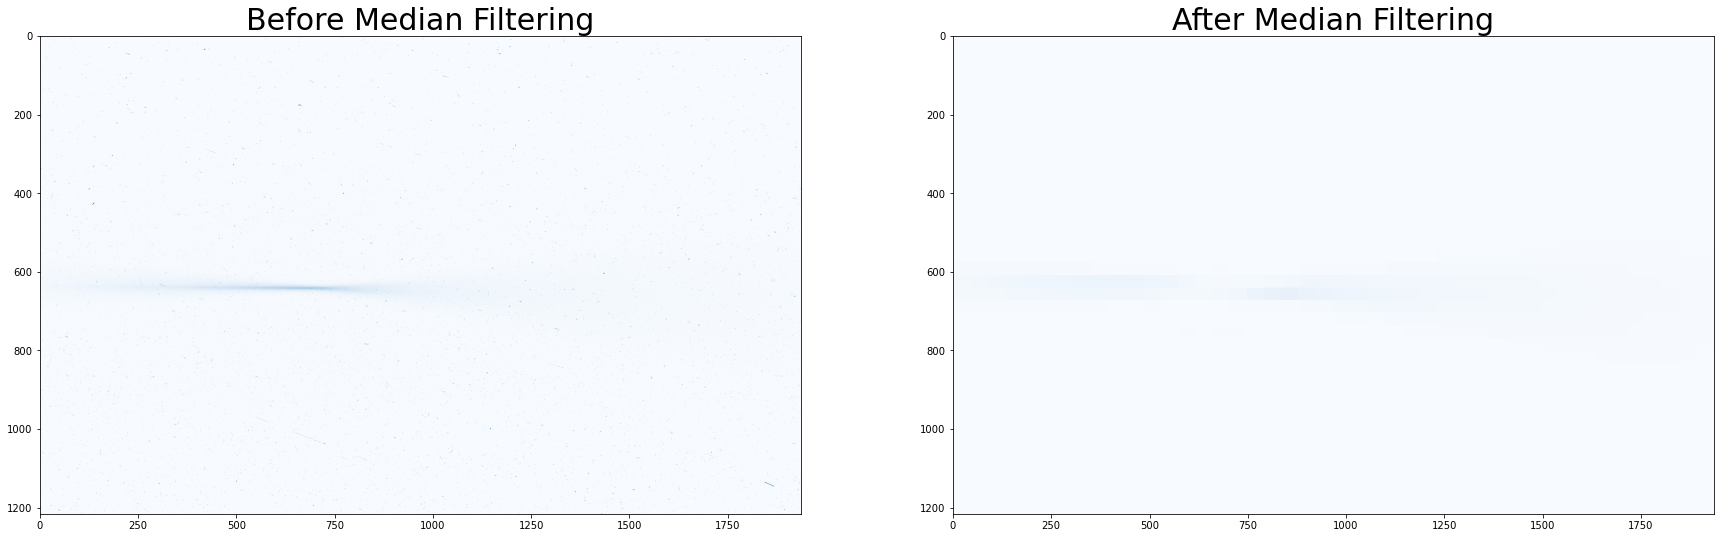

In [35]:
filtered_data = apply_filter(44,32)

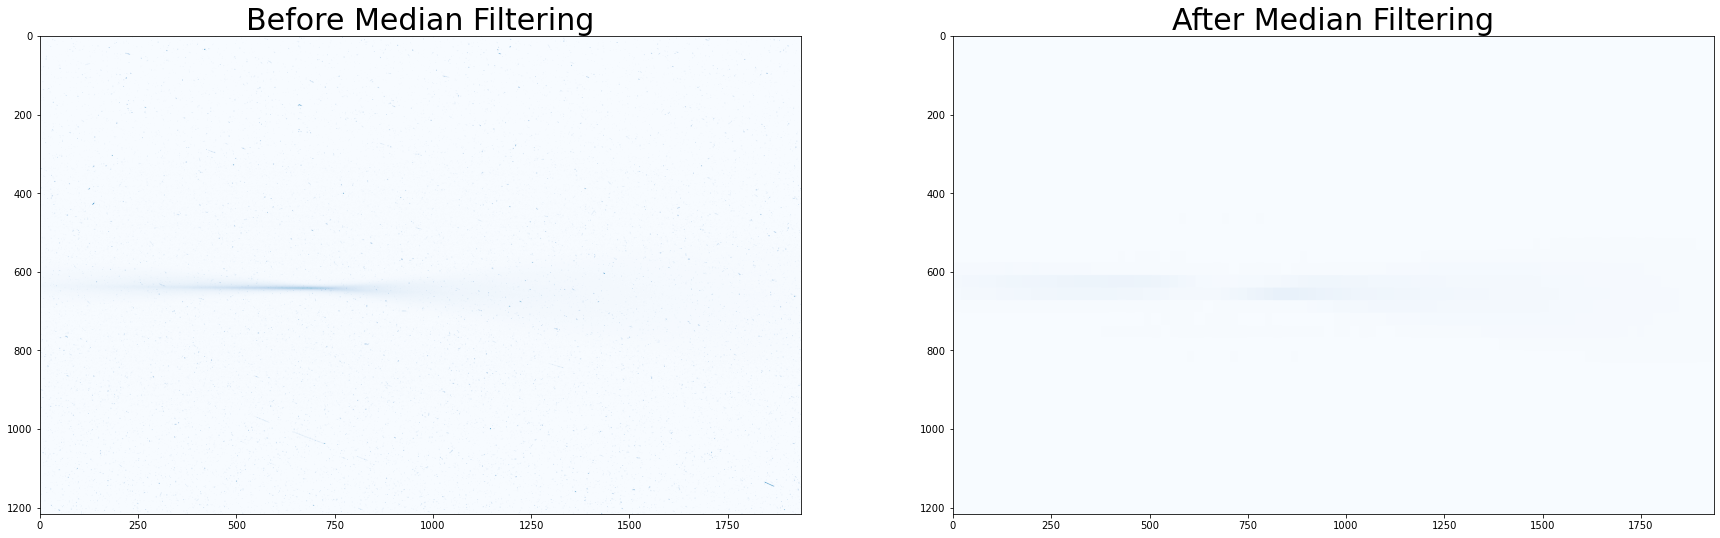

In [36]:
filtered_data = apply_filter(22,32)

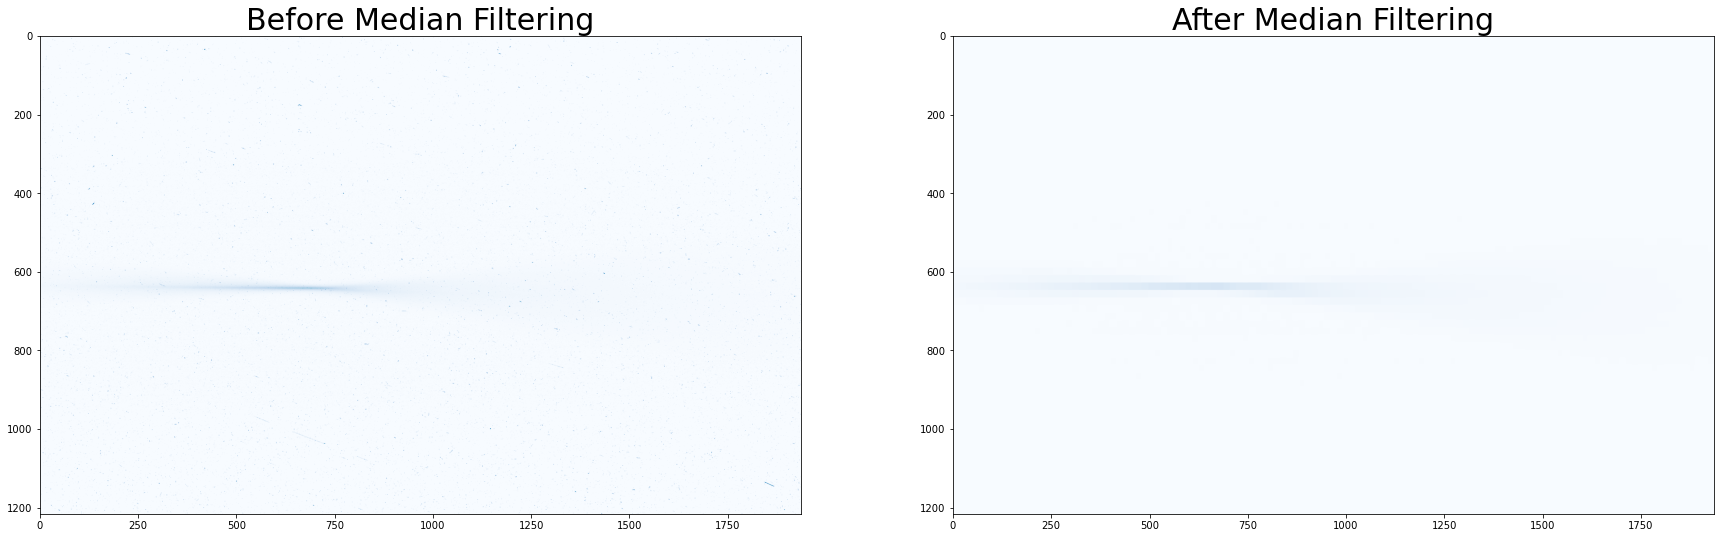

In [37]:
filtered_data = apply_filter(16,19)

In [6]:
data1 = f['AwakeEventData'][f'TCC4.SPECTRO3.DigiCam']['ExtractionImage']['image2D'][:]

In [12]:
filtered_image = ski.filters.median(data1, footprint=square(25))

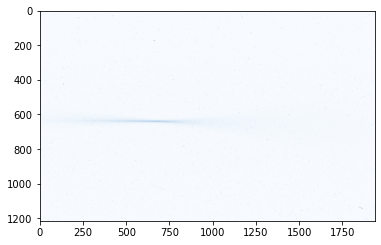

In [20]:
plt.imshow(data1,vmax=4095,cmap='Blues')

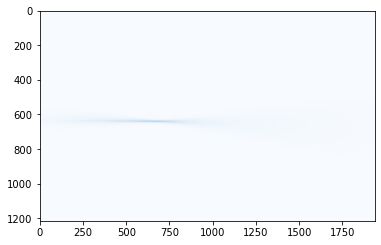

In [21]:
plt.imshow(filtered_image,vmax=4095,cmap='Blues')

In [22]:
filtered_image2 = ski.filters.median(data1, footprint=square(10))
#filtered_image3 = ski.filters.median(data1, footprint=square(10))
#filtered_image4 = ski.filters.median(data1, footprint=square(100))

In [23]:
filtered_image3 = ski.filters.median(data1, footprint=square(30))

In [45]:
filtered_image4 = ski.filters.median(data1, footprint=square(50))

In [17]:
mean_y_intensity_original = np.mean(data1, 1)

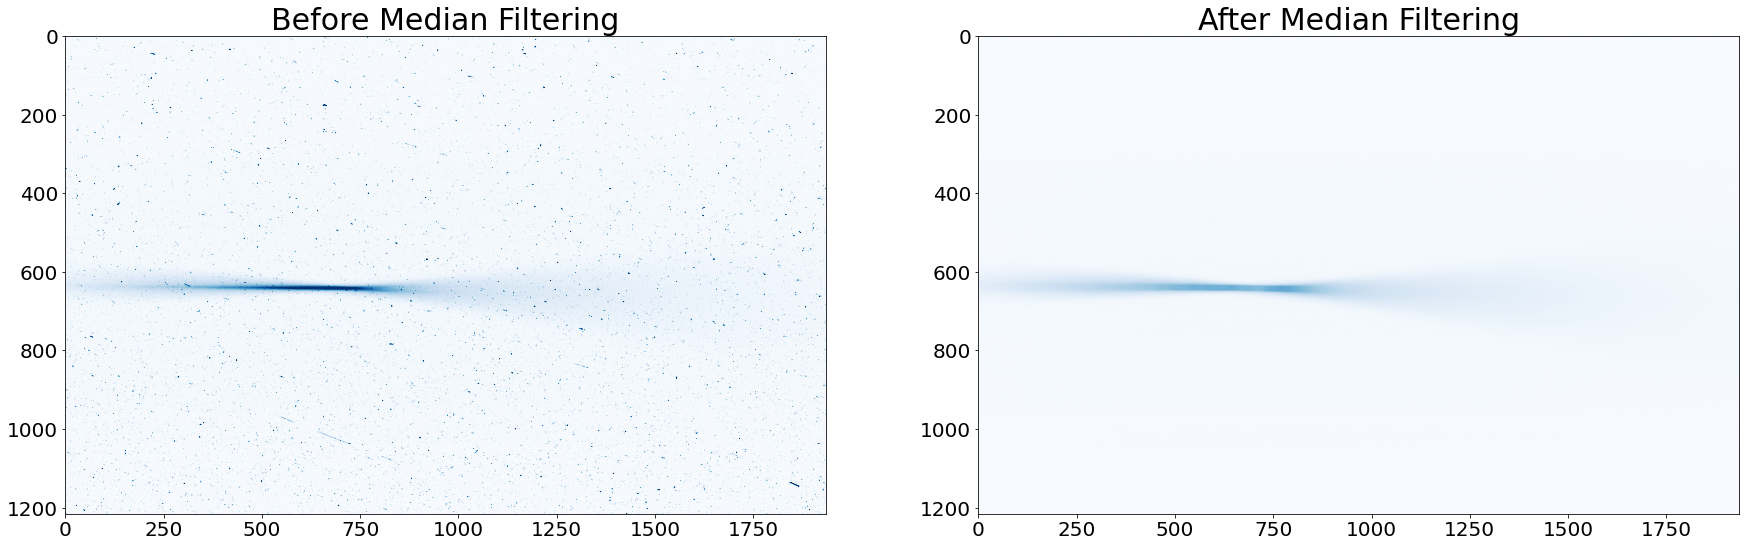

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30,10))

ax1.imshow(data1,vmax=1000,cmap='Blues')
ax2.imshow(filtered_image,vmax=1000,cmap='Blues')

ax1.set_title('Before Median Filtering',fontsize=30)
ax2.set_title('After Median Filtering',fontsize=30)

ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)

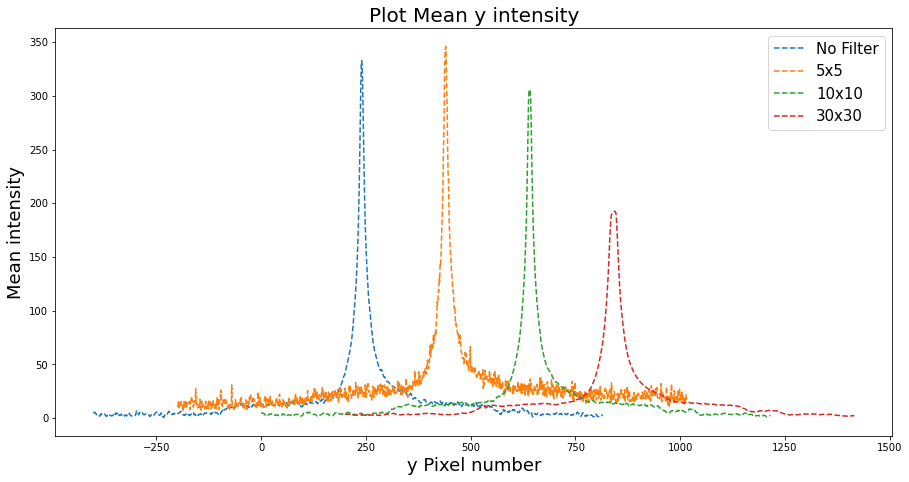

In [43]:
mean_y_intensity_original = np.mean(filtered_image, 1)
mean_data_intensity = np.mean(data1, 1)
mean_y_intensity1 = np.mean(filtered_image2, 1)
mean_data_intensity1 = np.mean(filtered_image3, 1)
#mean_data_intensity2 = np.mean(filtered_image4, 1)

x_axis = np.arange(0,len(mean_y_intensity_original),1)
## laplace????

plt.figure(figsize=(15,7.5))
plt.plot(x_axis-400,mean_y_intensity_original,'--',label='No Filter')
plt.plot(x_axis-200,mean_data_intensity,'--',label='5x5')
plt.plot(x_axis,mean_y_intensity1,'--',label='10x10')
plt.plot(x_axis+200,mean_data_intensity1,'--',label='30x30')
#plt.plot(x_axis+400,mean_data_intensity2,'--',label='50x50')


plt.title('Plot Mean y intensity',fontsize=20)
plt.xlabel('y Pixel number',fontsize=18)
plt.ylabel('Mean intensity',fontsize=18)
plt.legend(fontsize=15)


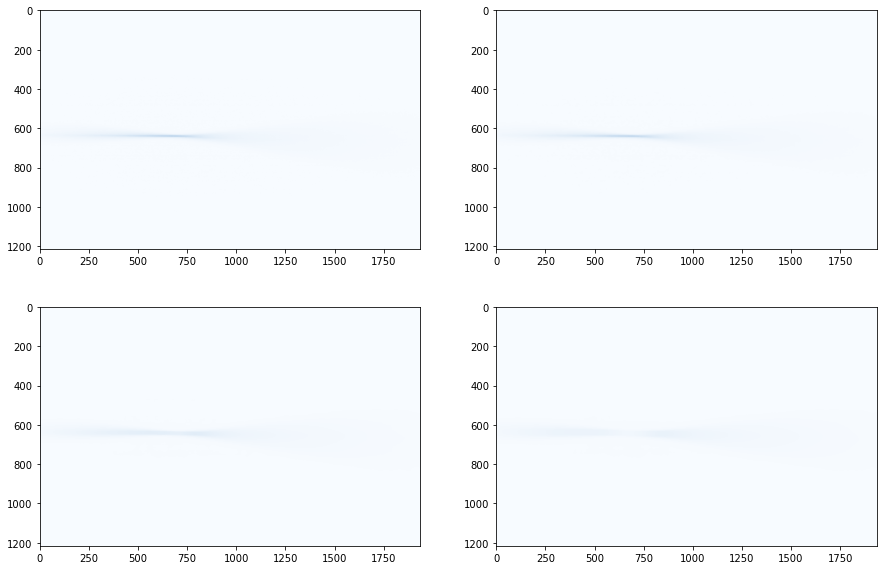

In [46]:
fig,((ax1,ax2),(ax3,ax4))= plt.subplots(2,2,figsize=(15,10))

ax1.imshow(filtered_image,vmax=4095,cmap='Blues')
ax2.imshow(filtered_image2,vmax=4095,cmap='Blues')
ax3.imshow(filtered_image3,vmax=4095,cmap='Blues')
ax4.imshow(filtered_image4,vmax=4095,cmap='Blues')

In [19]:
x_axis = np.arange(0,len(mean_y_intensity_original),1)

/tmp/ipykernel_613/3191741918.py:3: PeakPropertyWarning: some peaks have a prominence of 0
  original_fwhm =signal.peak_widths(mean_y_intensity_original, peaks=[640],rel_height=0.5, prominence_data=None, wlen=None)[0].tolist()
/tmp/ipykernel_613/3191741918.py:3: PeakPropertyWarning: some peaks have a width of 0
  original_fwhm =signal.peak_widths(mean_y_intensity_original, peaks=[640],rel_height=0.5, prominence_data=None, wlen=None)[0].tolist()


[[0.0], [18.348776822121977], [17.927106268902207], [18.27704555456546], [18.451673425297486], [18.878322176924712], [19.24086652353435], [19.866472702838564], [20.441356696504727], [21.14103069554301], [21.77217752224317]]


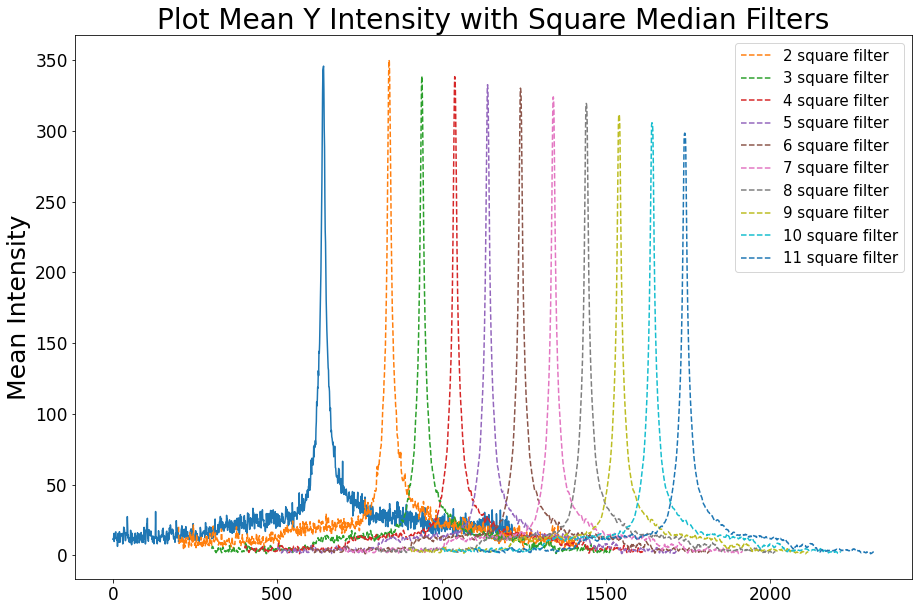

In [21]:
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(mean_y_intensity_original)
original_fwhm =signal.peak_widths(mean_y_intensity_original, peaks=[640],rel_height=0.5, prominence_data=None, wlen=None)[0].tolist()

fwhm_list = [original_fwhm]

for i in np.arange(2,12,1):
    
    filtered_data = ski.filters.median(data1, footprint=square(i))
    mean_y_intensity = np.mean(filtered_data, 1)
    
    fwhm = signal.peak_widths(mean_y_intensity, peaks=[640],rel_height=0.5, prominence_data=None, wlen=None)[0].tolist()
    fwhm_list.append(fwhm)
    
    ax.plot(x_axis+i*100,mean_y_intensity,'--',label=str(i)+' square filter')
    ax.legend(fontsize=15)
    
ax.set_title('Plot Mean Y Intensity with Square Median Filters',fontsize=28)
ax.set_ylabel('Mean Intensity',fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=17)

print(fwhm_list)

/tmp/ipykernel_613/3521980524.py:3: PeakPropertyWarning: some peaks have a prominence of 0
  original_fwhm =signal.peak_widths(mean_y_intensity_original, peaks=[640],rel_height=0.5, prominence_data=None, wlen=None)[0].tolist()
/tmp/ipykernel_613/3521980524.py:3: PeakPropertyWarning: some peaks have a width of 0
  original_fwhm =signal.peak_widths(mean_y_intensity_original, peaks=[640],rel_height=0.5, prominence_data=None, wlen=None)[0].tolist()


[[0.0], [18.03183021010011], [18.509273455356492], [19.040627554012303], [20.152208531076553], [21.045524294185498], [21.92187848933736], [23.28257577217039], [24.68782578123171], [26.348142741097263], [27.51466375907455]]


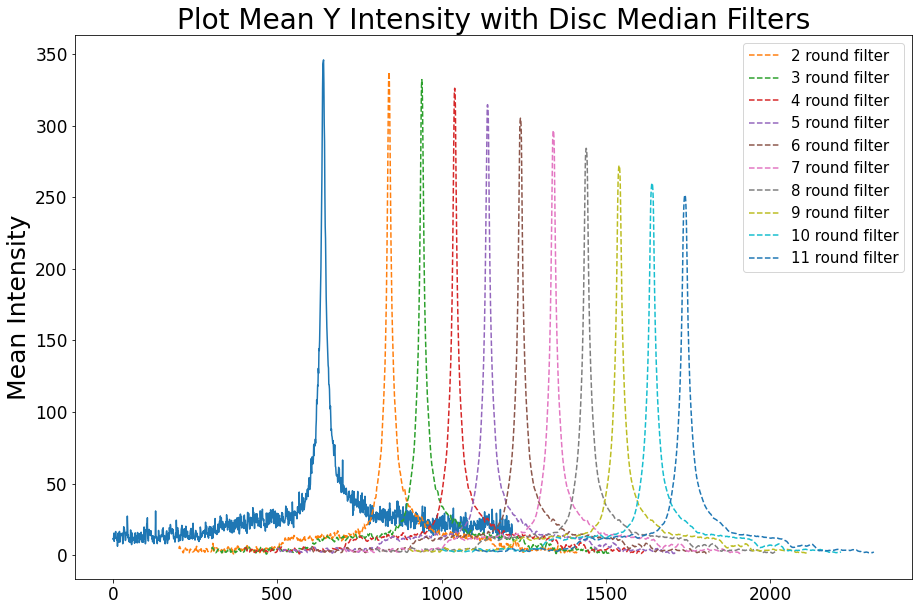

In [22]:
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(mean_y_intensity_original)
original_fwhm =signal.peak_widths(mean_y_intensity_original, peaks=[640],rel_height=0.5, prominence_data=None, wlen=None)[0].tolist()

fwhm_list = [original_fwhm]

for i in np.arange(2,12,1):
    
    filtered_data = ski.filters.median(data1, footprint=disk(i))
    mean_y_intensity = np.mean(filtered_data, 1)
    
    fwhm = signal.peak_widths(mean_y_intensity, peaks=[640],rel_height=0.5, prominence_data=None, wlen=None)[0].tolist()
    fwhm_list.append(fwhm)
    
    ax.plot(x_axis+i*100,mean_y_intensity,'--',label=str(i)+' round filter')
    ax.legend(fontsize=15)

    
ax.set_title('Plot Mean Y Intensity with Disc Median Filters',fontsize=28)
ax.set_ylabel('Mean Intensity',fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=17)

print(fwhm_list)

In [49]:
filtered_1 = ski.filters.median(data1, footprint=disk(3))
filtered_2 = ski.filters.median(data1, footprint=disk(5))
filtered_3 = ski.filters.median(data1, footprint=disk(7))
filtered_4 = ski.filters.median(data1, footprint=disk(10))

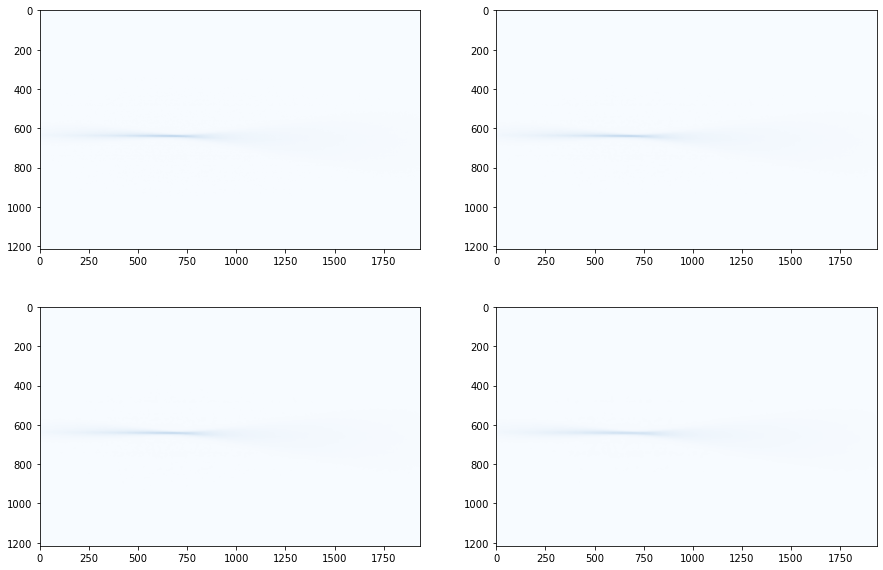

In [50]:
fig,((ax1,ax2),(ax3,ax4))= plt.subplots(2,2,figsize=(15,10))

ax1.imshow(filtered_1,vmax=4095,cmap='Blues')
ax2.imshow(filtered_2,vmax=4095,cmap='Blues')
ax3.imshow(filtered_3,vmax=4095,cmap='Blues')
ax4.imshow(filtered_4,vmax=4095,cmap='Blues')

In [51]:
mean_y_intensity_original

array([4.45196281, 4.98915289, 5.2267562 , ..., 2.58419421, 3.13791322,
       3.1838843 ])

In [52]:
np.argmax(mean_y_intensity_original)

640

In [53]:
signal.peak_widths(mean_y_intensity_original, peaks=[640],rel_height=0.1, prominence_data=None, wlen=None)

(array([5.21167632]),
 array([299.69121901]),
 array([637.51666563]),
 array([642.72834194]))

In [54]:
signal.peak_widths(mean_y_intensity_original, peaks=[640],rel_height=0.4, prominence_data=None, wlen=None)

(array([13.9086783]),
 array([200.18326446]),
 array([633.29452605]),
 array([647.20320435]))

In [55]:
signal.peak_widths(mean_y_intensity1, peaks=[640],rel_height=0.4, prominence_data=None, wlen=None)

(array([16.00740227]),
 array([184.3285124]),
 array([632.80714812]),
 array([648.81455039]))

In [56]:
max1 = np.max(filtered_1)

In [57]:
np.argmax(filtered_1)

1239711

## Area without signal

In [3]:
data = f['AwakeEventData'][f'TCC4.SPECTRO1.DigiCam']['ExtractionImage']['image2D'][780:850,1000:1250]
#data = f['AwakeEventData'][f'TCC4.SPECTRO3.DigiCam']['ExtractionImage']['image2D'][:]

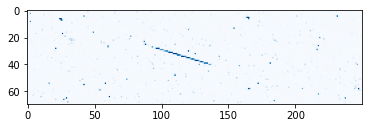

In [4]:
#figsize()

plt.imshow(data,vmax=4095,cmap='Blues')

In [5]:
filtered_image2_squre = ski.filters.median(data, footprint=square(2))
filtered_image3_squre = ski.filters.median(data, footprint=square(3))
filtered_image4_squre = ski.filters.median(data, footprint=square(4))
filtered_image5_squre = ski.filters.median(data, footprint=square(5))
filtered_image1_squre = ski.filters.median(data, footprint=square(1))

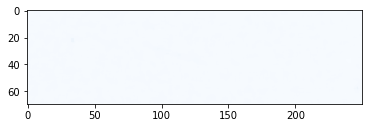

In [7]:
filtered_image = ski.filters.median(data, footprint=square(4))

plt.imshow(filtered_image,vmax=4095,cmap='Blues')

Text(0.5, 1.0, '5x5 filter')

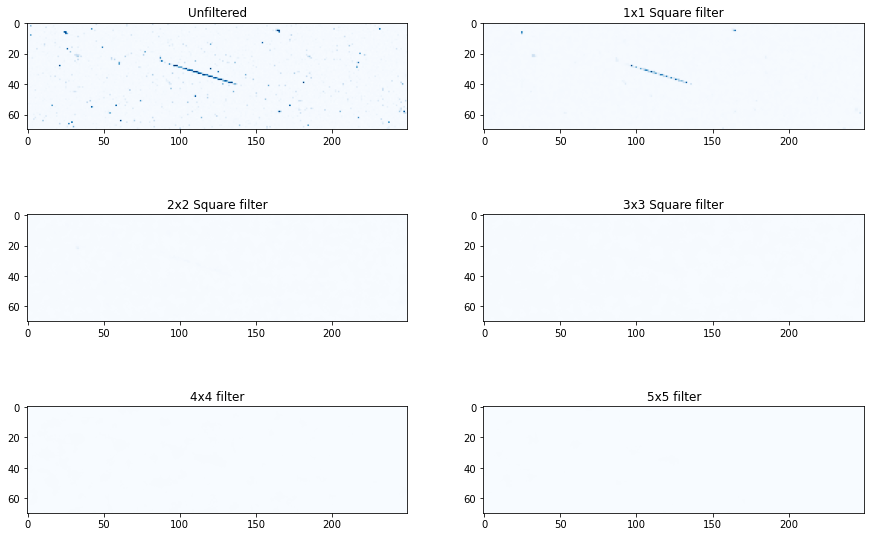

In [8]:
fig,((ax1,ax2),(ax3,ax4), (ax5,ax6))= plt.subplots(3,2,figsize=(15,10))

ax1.imshow(data,vmax=4095,cmap='Blues')
ax3.imshow(filtered_image2,vmax=4095,cmap='Blues')
ax4.imshow(filtered_image3,vmax=4095,cmap='Blues')
ax5.imshow(filtered_image4,vmax=4095,cmap='Blues')
ax6.imshow(filtered_image5,vmax=4095,cmap='Blues')
ax2.imshow(filtered_image1,vmax=4095,cmap='Blues')

ax1.set_title('Unfiltered')
ax2.set_title('1x1 Square filter')
ax3.set_title('2x2 Square filter')
ax4.set_title('3x3 Square filter')
ax5.set_title('4x4 filter')
ax6.set_title('5x5 filter')

In [7]:
filtered_image2 = ski.filters.median(data, footprint=disk(2))
filtered_image3 = ski.filters.median(data, footprint=disk(3))
filtered_image4 = ski.filters.median(data, footprint=disk(4))
filtered_image5 = ski.filters.median(data, footprint=disk(5))
filtered_image1 = ski.filters.median(data, footprint=disk(1))

Text(0.5, 1.0, '5x5 filter')

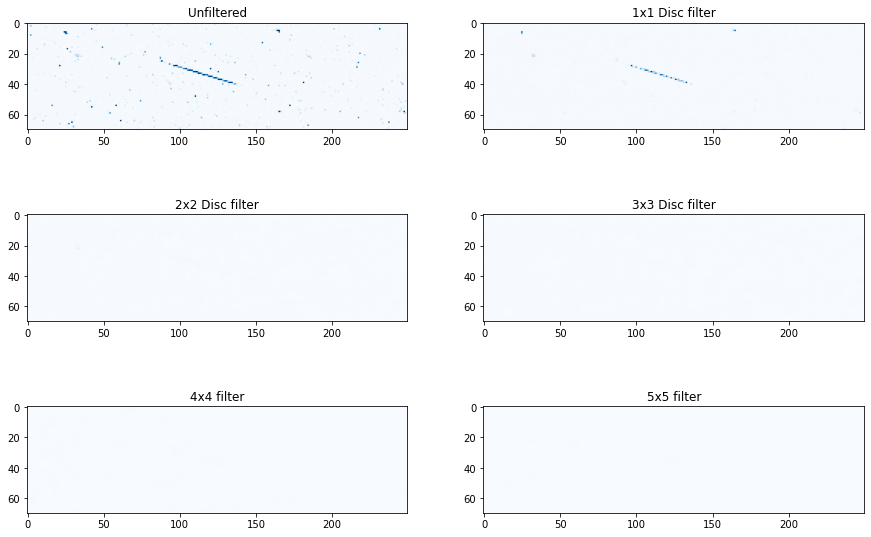

In [19]:
fig,((ax1,ax2),(ax3,ax4), (ax5,ax6))= plt.subplots(3,2,figsize=(15,10))

ax1.imshow(data,vmax=4095,cmap='Blues')
ax3.imshow(filtered_image2,vmax=4095,cmap='Blues')
ax4.imshow(filtered_image3,vmax=4095,cmap='Blues')
ax5.imshow(filtered_image4,vmax=4095,cmap='Blues')
ax6.imshow(filtered_image5,vmax=4095,cmap='Blues')
ax2.imshow(filtered_image1,vmax=4095,cmap='Blues')

ax1.set_title('Unfiltered')
ax2.set_title('1x1 Disc filter')
ax3.set_title('2x2 Disc filter')
ax4.set_title('3x3 Disc filter')
ax5.set_title('4x4 filter')
ax6.set_title('5x5 filter')

Text(0.5, 1.0, '3x3 Disc filter')

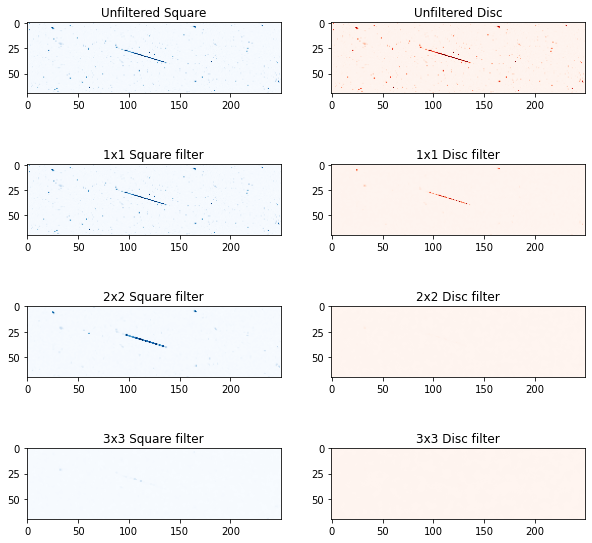

In [17]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,figsize=(10,10))

ax1.imshow(data,vmax=4095,cmap='Blues')
ax5.imshow(filtered_image2_squre,vmax=4095,cmap='Blues')
ax7.imshow(filtered_image3_squre,vmax=4095,cmap='Blues')
ax3.imshow(filtered_image1_squre,vmax=4095,cmap='Blues')

ax1.set_title('Unfiltered Square')
ax3.set_title('1x1 Square filter')
ax5.set_title('2x2 Square filter')
ax7.set_title('3x3 Square filter')

ax2.imshow(data,vmax=4095,cmap='Reds')
ax4.imshow(filtered_image1,vmax=4095,cmap='Reds')
ax6.imshow(filtered_image2,vmax=4095,cmap='Reds')
ax8.imshow(filtered_image3,vmax=4095,cmap='Reds')

ax2.set_title('Unfiltered Disc')
ax4.set_title('1x1 Disc filter')
ax6.set_title('2x2 Disc filter')
ax8.set_title('3x3 Disc filter')

In [6]:
original_std = np.std(data)

In [7]:
std_list_square = [original_std]
std_list_circle = [original_std]

for i in np.arange(1,12,1):
    
    filtered_data_square = ski.filters.median(data, footprint=square(i))
    filtered_data_disc = ski.filters.median(data, footprint=disk(i))
    
    std_square = np.std(filtered_data_square)
    std_round = np.std(filtered_data_disc)

    std_list_square.append(std_square)
    std_list_circle.append(std_round)


print(std_list_square)
print(std_list_circle)

[261.2566056524911, 261.2566056524911, 221.736638671169, 19.52087566821421, 6.486724553160203, 4.310259767729333, 3.7165732226317933, 3.259110383186786, 2.9594706702657594, 2.7159136717968524, 2.543843709099781, 2.4066128454230236]
[261.2566056524911, 109.42317183252646, 7.240233934657874, 4.010923706121388, 3.2340368258602754, 2.7035590625873076, 2.439437606649265, 2.270409569092892, 2.1134993904587214, 2.0094972375584654, 1.9363564353956013, 1.8759897575979045]


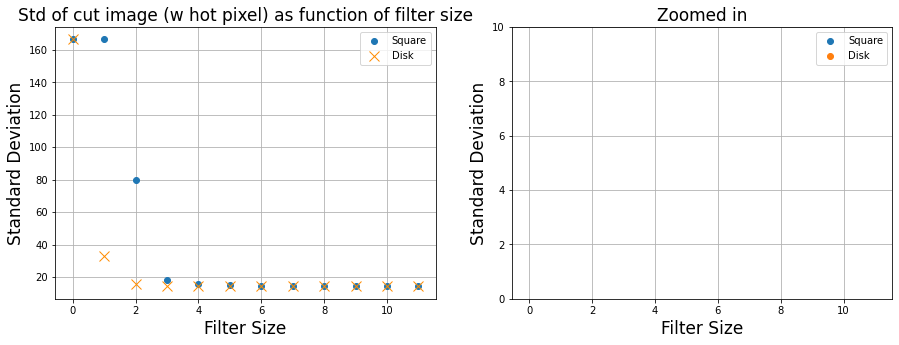

In [31]:
fig,((ax1,ax2))= plt.subplots(1,2,figsize=(15,5))

ax1.plot(std_list_square,'o',label='Square')
ax1.plot(std_list_circle,'x',markersize=10,color='darkorange',label='Disk')

ax1.set_title('Std of cut image (w hot pixel) as function of filter size',fontsize=17)
ax1.set_xlabel('Filter Size',fontsize=17)
ax1.set_ylabel('Standard Deviation',fontsize=17)

ax1.legend()

ax2.plot(std_list_square,'o',label='Square')
ax2.plot(std_list_circle,'o',label='Disk')

ax2.set_title('Zoomed in',fontsize=17)
ax2.set_xlabel('Filter Size',fontsize=17)
ax2.set_ylabel('Standard Deviation',fontsize=17)
ax2.set_ylim(0,10)

ax2.legend()
ax2.grid()
ax1.grid()

[166.5973071533172, 166.5973071533172, 79.98716614233838, 18.20566858953747, 15.888532978486088, 14.741004297751877, 14.526552900837967, 14.383732254553705, 14.364873427398873, 14.294317526130568, 14.287029985591841, 14.24483215256221]
[166.5973071533172, 33.11677125693731, 15.875568206209724, 14.53592994085798, 14.38490973969699, 14.295044231979785, 14.252836959247851, 14.224646018573607, 14.200763065638744, 14.180687943846245, 14.163650819031488, 14.151177254850241]


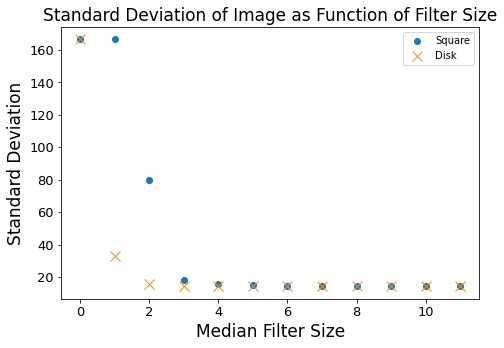

In [24]:
fig,(ax1)= plt.subplots(1,figsize=(7.5,5))

data_t = f['AwakeEventData'][f'TCC4.SPECTRO1.DigiCam']['ExtractionImage']['image2D'][:]
std = np.std(data_t)

std_list_square = [std]
std_list_circle = [std]

for i in np.arange(1,12,1):
    
    filtered_data_square = ski.filters.median(data_t, footprint=square(i))
    filtered_data_disc = ski.filters.median(data_t, footprint=disk(i))
    
    std_square = np.std(filtered_data_square)
    std_round = np.std(filtered_data_disc)

    std_list_square.append(std_square)
    std_list_circle.append(std_round)


print(std_list_square)
print(std_list_circle)

ax1.plot(std_list_square,'o',label='Square')
ax1.plot(std_list_circle,'x',markersize=10,color='darkorange',label='Disk')

ax1.set_title('Standard Deviation of Image as Function of Filter Size',fontsize=17)
ax1.set_xlabel('Median Filter Size',fontsize=17)
ax1.set_ylabel('Standard Deviation',fontsize=17)
ax1.tick_params(axis='both', which='major', labelsize=13)

ax1.legend()

In [138]:
stats.median_abs_deviation(data_t.ravel(), center=np.median)

15.0

[15.0, 15.0, 14.0, 12.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
[15.0, 12.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]


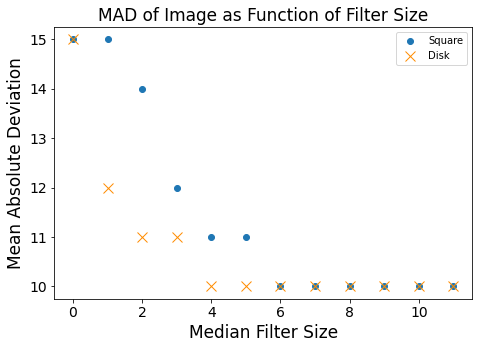

In [23]:
fig,(ax1)= plt.subplots(1,figsize=(7.5,5))

data_t = f['AwakeEventData'][f'TCC4.SPECTRO1.DigiCam']['ExtractionImage']['image2D'][:]
mad = stats.median_abs_deviation(data_t.ravel(), center=np.median)

mad_list_square = [mad]
mad_list_circle = [mad]

for i in np.arange(1,12,1):
    
    filtered_data_square = ski.filters.median(data_t, footprint=square(i))
    filtered_data_disc = ski.filters.median(data_t, footprint=disk(i))
    
    mad_square = stats.median_abs_deviation(filtered_data_square.ravel(), center=np.median)
    mad_round = stats.median_abs_deviation(filtered_data_disc.ravel(), center=np.median)

    mad_list_square.append(mad_square)
    mad_list_circle.append(mad_round)


print(mad_list_square)
print(mad_list_circle)

ax1.plot(mad_list_square,'o',label='Square')
ax1.plot(mad_list_circle,'x',markersize=10,color='darkorange',label='Disk')

ax1.set_title('MAD of Image as Function of Filter Size',fontsize=17)
ax1.set_xlabel('Median Filter Size',fontsize=17)
ax1.set_ylabel('Mean Absolute Deviation',fontsize=17)
ax1.tick_params(axis='both', which='major', labelsize=14)

ax1.legend()

[10.0, 10.0, 7.0, 4.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
[10.0, 5.0, 3.0, 3.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0]


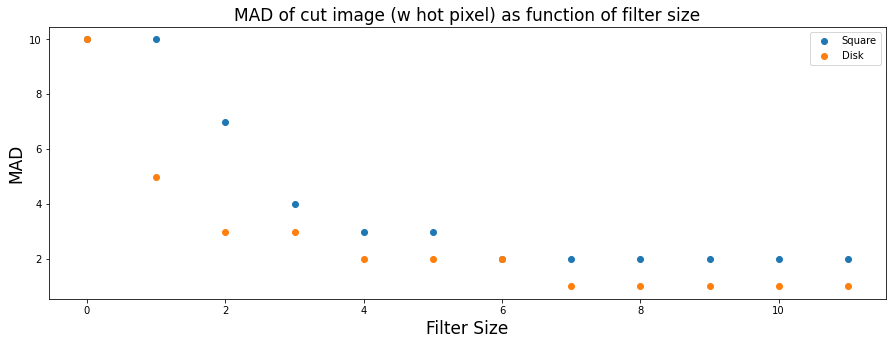

In [161]:
fig,(ax1)= plt.subplots(1,figsize=(15,5))

data_cut = f['AwakeEventData'][f'TCC4.SPECTRO1.DigiCam']['ExtractionImage']['image2D'][780:850,1000:1250]
mad = stats.median_abs_deviation(data_cut.ravel(), center=np.median)

mad_list_square = [mad]
mad_list_circle = [mad]

for i in np.arange(1,12,1):
    
    filtered_data_square = ski.filters.median(data_cut, footprint=square(i))
    filtered_data_disc = ski.filters.median(data_cut, footprint=disk(i))
    
    mad_square = stats.median_abs_deviation(filtered_data_square.ravel(), center=np.median)
    mad_round = stats.median_abs_deviation(filtered_data_disc.ravel(), center=np.median)

    mad_list_square.append(mad_square)
    mad_list_circle.append(mad_round)


print(mad_list_square)
print(mad_list_circle)

ax1.plot(mad_list_square,'o',label='Square')
ax1.plot(mad_list_circle,'o',label='Disk')

ax1.set_title('MAD of cut image (w hot pixel) as function of filter size',fontsize=17)
ax1.set_xlabel('Filter Size',fontsize=17)
ax1.set_ylabel('MAD',fontsize=17)

ax1.legend()

[9.0, 9.0, 7.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
[9.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0]


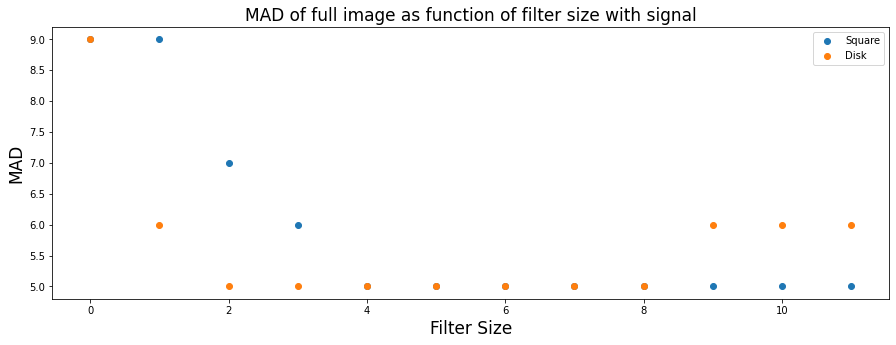

In [159]:
fig,(ax1)= plt.subplots(1,figsize=(15,5))

data_signal = f['AwakeEventData'][f'TCC4.SPECTRO3.DigiCam']['ExtractionImage']['image2D'][:]
mad = stats.median_abs_deviation(data_signal.ravel(), center=np.median)

mad_list_square = [mad]
mad_list_circle = [mad]

for i in np.arange(1,12,1):
    
    filtered_data_square = ski.filters.median(data_signal, footprint=square(i))
    filtered_data_disc = ski.filters.median(data_signal, footprint=disk(i))
    
    mad_square = stats.median_abs_deviation(filtered_data_square.ravel(), center=np.median)
    mad_round = stats.median_abs_deviation(filtered_data_disc.ravel(), center=np.median)

    mad_list_square.append(mad_square)
    mad_list_circle.append(mad_round)


print(mad_list_square)
print(mad_list_circle)

ax1.plot(mad_list_square,'o',label='Square')
ax1.plot(mad_list_circle,'o',label='Disk')

ax1.set_title('MAD of full image as function of filter size with signal',fontsize=17)
ax1.set_xlabel('Filter Size',fontsize=17)
ax1.set_ylabel('MAD',fontsize=17)

ax1.legend()

[140.367739879962, 140.367739879962, 86.55810793685026, 50.046069999295554, 49.682808351563416, 48.684317405885686, 49.02225000102543, 48.208576716707945, 48.311190977156485, 47.42729616354971, 47.264120446451116, 46.39842804879882]
[140.367739879962, 57.221641286545015, 48.962446393730644, 48.61807636577333, 48.26324025977343, 47.547540605970866, 46.78672803155752, 46.003334559268275, 44.90213447449743, 43.75780517185554, 42.547132374877656, 41.62545379078435]


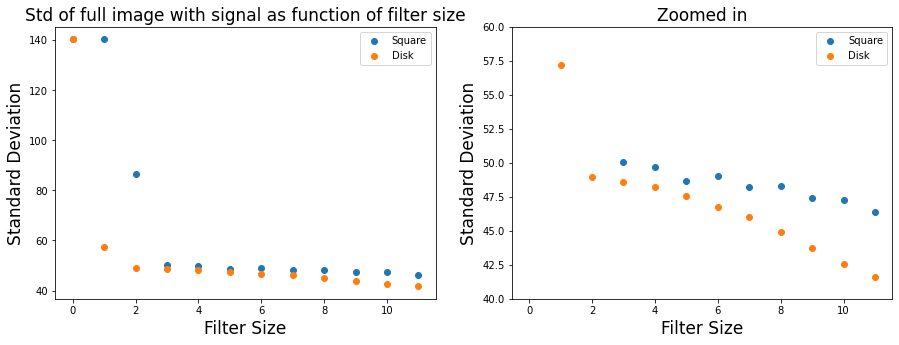

In [160]:
fig,((ax1,ax2))= plt.subplots(1,2,figsize=(15,5))

data_spectro3 = f['AwakeEventData'][f'TCC4.SPECTRO3.DigiCam']['ExtractionImage']['image2D'][:]
std = np.std(data_spectro3)

std_list_square = [std]
std_list_circle = [std]

for i in np.arange(1,12,1):
    
    filtered_data_square = ski.filters.median(data_spectro3, footprint=square(i))
    filtered_data_disc = ski.filters.median(data_spectro3, footprint=disk(i))
    
    std_square = np.std(filtered_data_square)
    std_round = np.std(filtered_data_disc)

    std_list_square.append(std_square)
    std_list_circle.append(std_round)


print(std_list_square)
print(std_list_circle)

ax1.plot(std_list_square,'o',label='Square')
ax1.plot(std_list_circle,'o',label='Disk')

ax1.set_title('Std of full image with signal as function of filter size',fontsize=17)
ax1.set_xlabel('Filter Size',fontsize=17)
ax1.set_ylabel('Standard Deviation',fontsize=17)

ax1.legend()

ax2.plot(std_list_square,'o',label='Square')
ax2.plot(std_list_circle,'o',label='Disk')

ax2.set_title('Zoomed in',fontsize=17)
ax2.set_xlabel('Filter Size',fontsize=17)
ax2.set_ylabel('Standard Deviation',fontsize=17)
ax2.set_ylim(40,60)

ax2.legend()

In [9]:
## simple function to load in and plot spectrometer data
def subtract_sensor(date,event_no,spectro_no,mean):
    
    file = os.listdir('/eos/experiment/awake/event_data/'+date)
    f = h5py.File('/eos/experiment/awake/event_data/'+date+'/'+files[event_no],'r')
    
    fig = np.array((f['AwakeEventData'][f'TCC4.SPECTRO'+str(spectro_no)+'.DigiCam']['ExtractionImage']['image2D'][:]))-mean
    
    return fig

In [15]:
### note - check if values the same with sensor noise removed ## yes

In [16]:
bg_sensor = subtract_sensor('2024/10/08',248,3,3.78126279)

# Fitting to spectrometer

In [12]:
## Pick image
## Remove sensor
## Apply disk 4x4 filter

In [4]:
files = os.listdir('/eos/experiment/awake/event_data/2024/10/08')

f = h5py.File('/eos/experiment/awake/event_data/2024/10/08/'+files[248],'r')

In [5]:
data = f['AwakeEventData'][f'TCC4.SPECTRO1.DigiCam']['ExtractionImage']['image2D'][:]

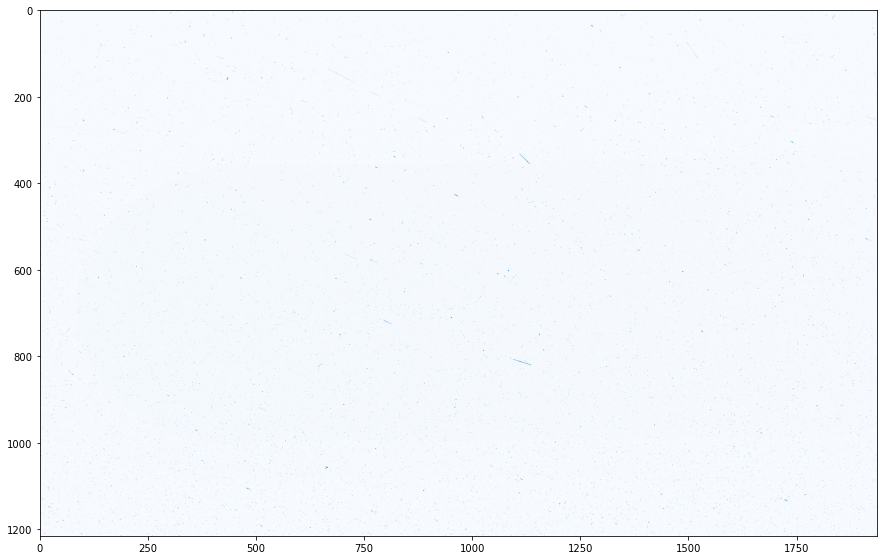

In [48]:
plt.figure(figsize=(15,10))
plt.imshow(data,vmax=4095,cmap='Blues')

In [17]:
bg_sensor = subtract_sensor('2024/10/08',248,1,3.78126279)

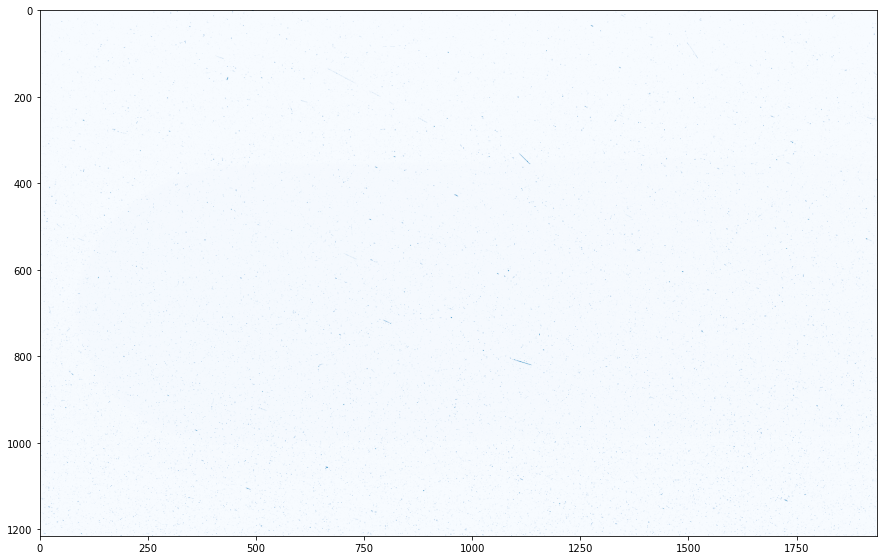

In [50]:
plt.figure(figsize=(15,10))
plt.imshow(bg_sensor,vmax=4095,cmap='Blues')

In [51]:
w_median_filter = ski.filters.median(bg_sensor, footprint=disk(4))

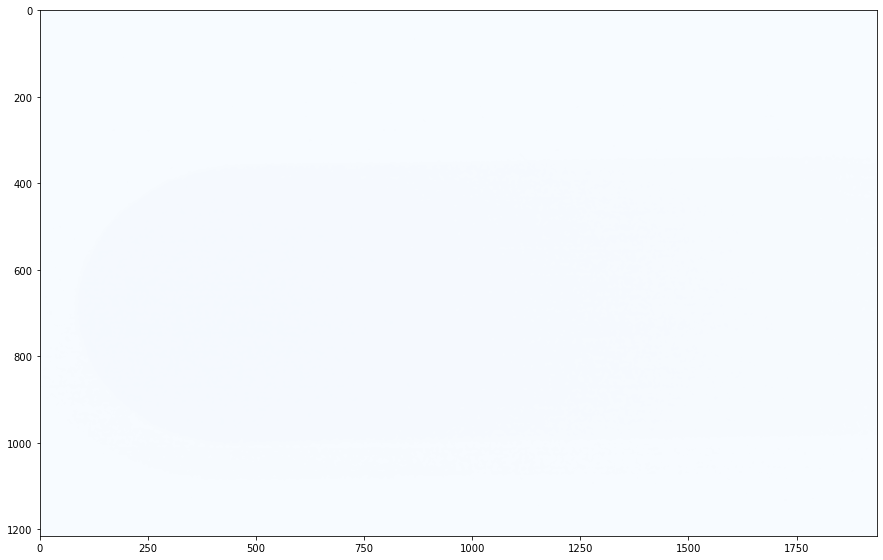

In [23]:
plt.figure(figsize=(15,10))
plt.imshow(w_median_filter,vmax=4095,cmap='Blues')

In [24]:
## pixel value against proton bunch population

In [7]:
#Load in Data function
def load_data(event_no,spectro_no):
    
    files = os.listdir('/eos/experiment/awake/event_data/2024/10/08')
    f = h5py.File('/eos/experiment/awake/event_data/2024/10/08/'+files[event_no],'r')
    data = f['AwakeEventData'][f'TCC4.SPECTRO'+str(spectro_no)+'.DigiCam']['ExtractionImage']['image2D'][:]
    protons= f['AwakeEventData']['TT41.BCTF.412340']['CaptureAcquisition']['totalIntensity'][0]
    RIF = f['AwakeEventData']['Sps2AwakeSynchro']['ProtonDelayNs']['delay'][0]
    density = f['AwakeEventData']['TSG41.AWAKE-DENSITY-DATA']['ValueAcquisition']['floatValue'][2]
    
    return files,data, protons, RIF, density

In [5]:
for i in np.arange(0,100,10):
    
    files,data,protons,rif,density = load_data(i,1)
    print(density)

0.0
0.0
983394181736927.2
978720048761401.5
977834984362800.5
978649566371889.1
979270231375741.9
978560442020309.2
977711790226033.6
978694487035038.2


In [3]:
files = os.listdir('/eos/experiment/awake/event_data/2024/10/08')

f = h5py.File('/eos/experiment/awake/event_data/2024/10/08/'+files[248],'r')
list(f['AwakeEventData']['SV.GSPLDGAIN-2']['ExpertAcquisition'])

['bitResolution',
 'data',
 'data_max',
 'data_min',
 'hwChannel',
 'hwLun',
 'hwType',
 'offset',
 'outputRange',
 'outputUnit',
 'scalingFactor',
 'units']

In [4]:
#Load in Data function
def load_rif(event_no,spectro_no):
    
    f = h5py.File('/eos/experiment/awake/event_data/2024/10/08/'+files[event_no],'r')
    protons= f['AwakeEventData']['TT41.BCTF.412340']['CaptureAcquisition']['totalIntensity'][0]
    RIF = f['AwakeEventData']['Sps2AwakeSynchro']['ProtonDelayNs']['delay'][0]
    
    return protons, RIF

In [ ]:
#load_rif(200,1)

In [ ]:
len(files)

In [5]:
files = os.listdir('/eos/experiment/awake/event_data/2024/10/08')
list_rifs = []

for i in np.arange(0,len(files),1):
    protons, rif = load_rif(i,1)
    
    if not rif in list_rifs:
        list_rifs.append(rif)
        
print(list_rifs)

[1121740.769, 1121740.74, 1121740.24, 1121740.94, 1121742.74, 1121740.84, 1121740.64, 1121740.79, 1121740.77, 1121740.76, 1121740.75, 1121740.73, 1121740.745, 1121740.735, 1121741.14, 1121741.34, 1121741.24, 1121740.69]


In [10]:
files = os.listdir('/eos/experiment/awake/event_data/'+'2024/10/08')

rif_data = {}

for i in np.arange(0,len(files),1):
    
    files,data,protons,rif,density = load_data(i,1)
    bg_sensor = subtract_sensor('2024/10/08',i,1,3.78126279)
    w_median_filter = ski.filters.median(bg_sensor, footprint=disk(4)) 
    
    if rif not in rif_data:
        rif_data[rif] = {'fit_parameters': [], 'proton_count': [],'density': []}

    # Store values for the corresponding RIF
    rif_data[rif]['fit_parameters'].append(np.mean(w_median_filter))
    rif_data[rif]['proton_count'].append(protons)
    rif_data[rif]['density'].append(density)

In [11]:
np.array(rif_data[rif]['density'])

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.30908054e+14, 9.83527069e+14, 9.85072630e+14, 9.85170617e+14,
       9.85783401e+14, 9.84809005e+14, 9.84146109e+14, 9.83394182e+14,
       9.83015849e+14, 9.82241965e+14, 9.81442471e+14, 9.81425725e+14,
       9.81131774e+14, 9.79978614e+14, 9.80154985e+14, 9.78972224e+14,
       9.79608040e+14, 6.87738508e+13, 2.93593478e+13, 1.82114759e+13,
       9.80012293e+14, 6.13334285e+12, 6.68569536e+12, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.37907546e+12, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.58028404e+14, 9.87113412e+14,
       9.88312409e+14, 9.84900263e+14, 9.84811634e+14, 9.84907092e+14,
       9.84726995e+14, 9.84724680e+14, 9.83435350e+14, 9.81399160e+14,
       9.82153821e+14, 9.48650921e+13, 2.72211560e+13, 1.69667458e+13,
      

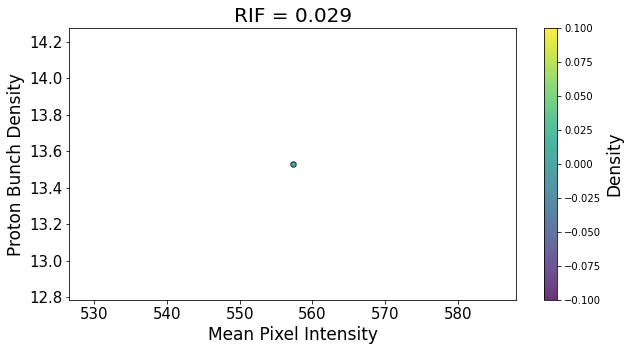

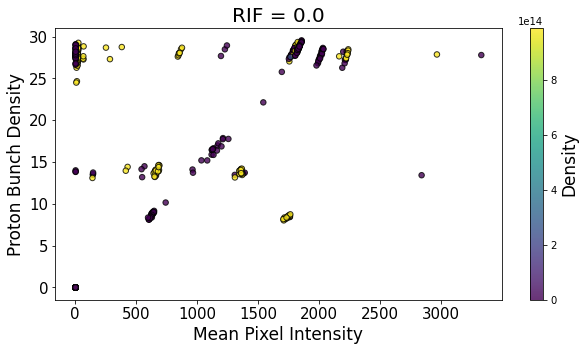

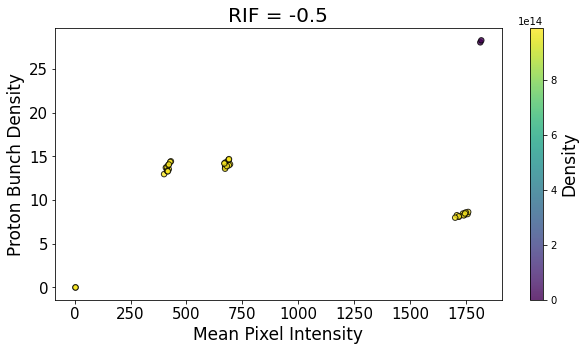

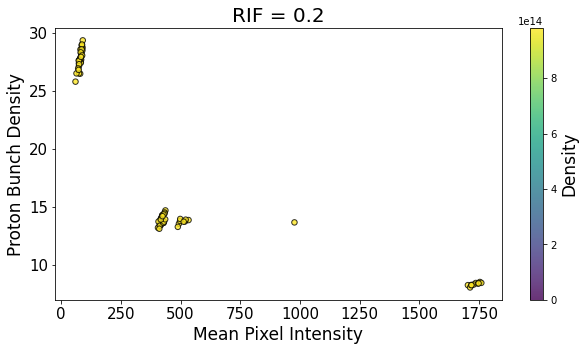

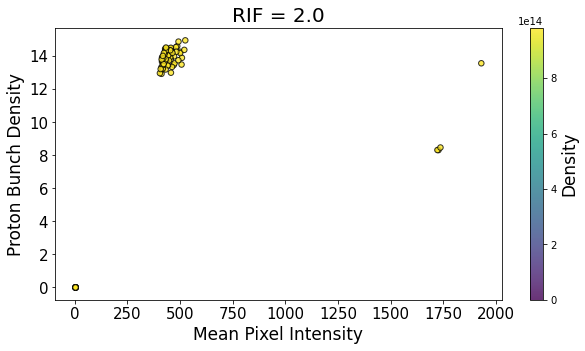

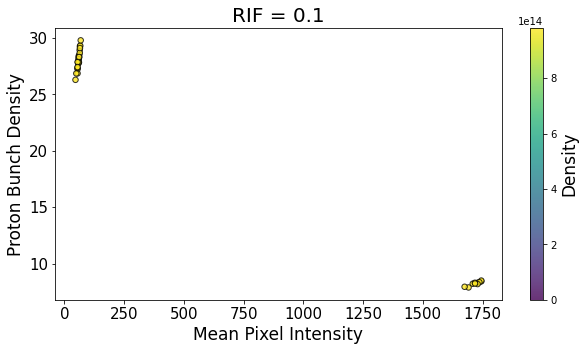

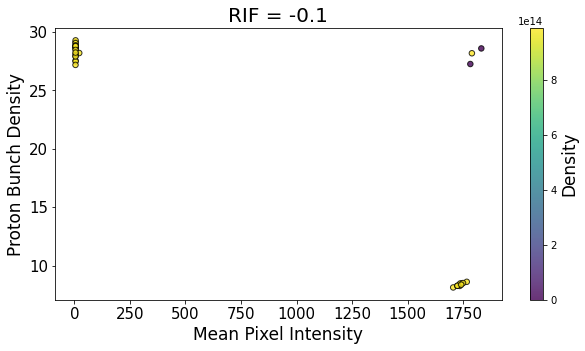

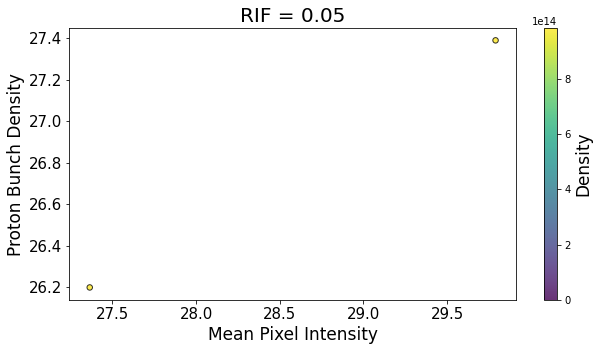

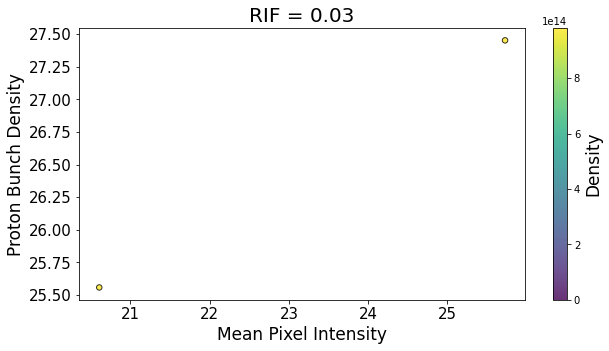

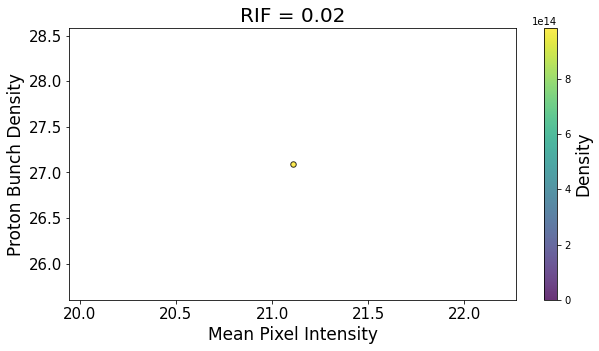

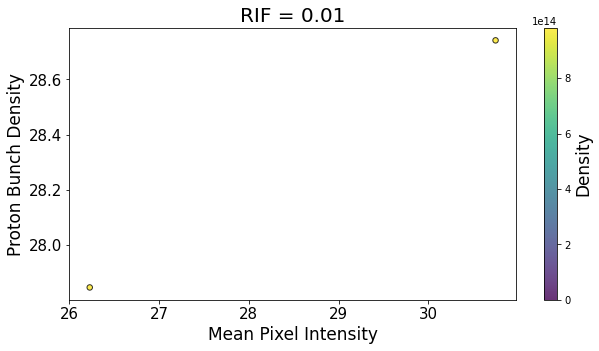

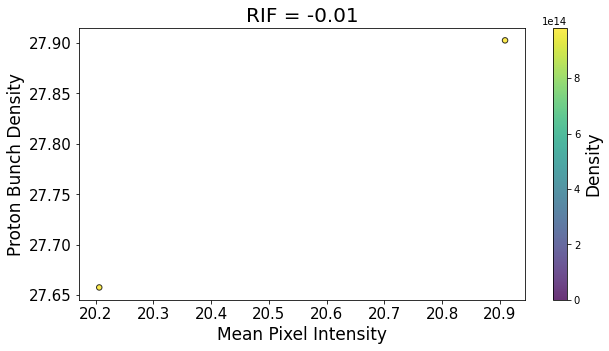

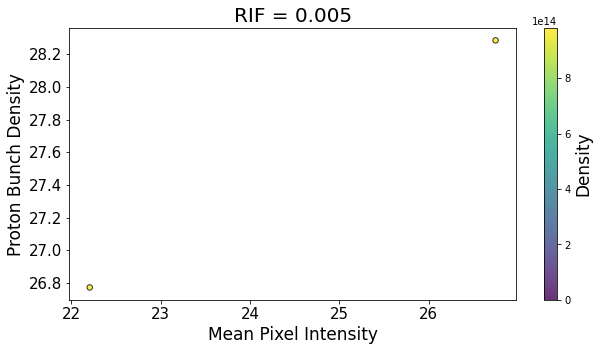

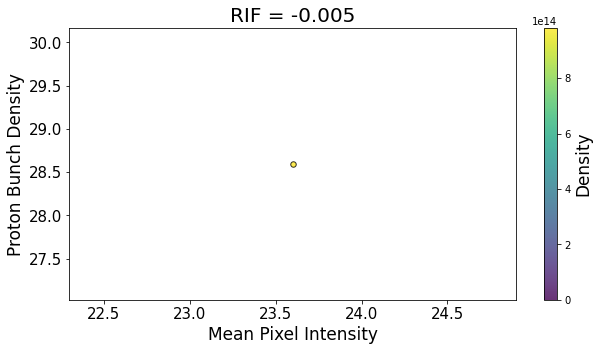

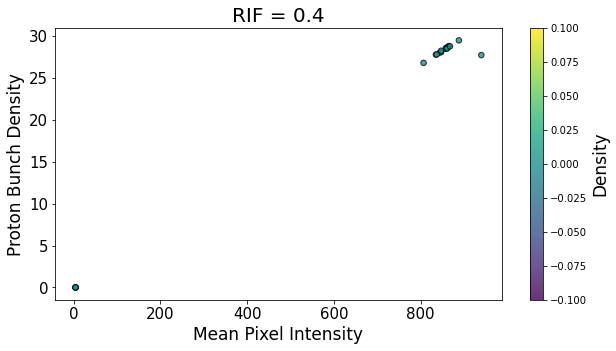

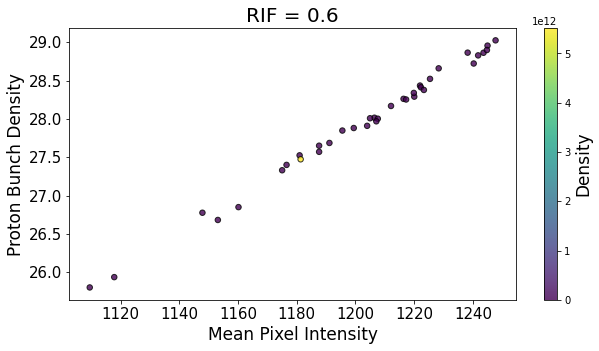

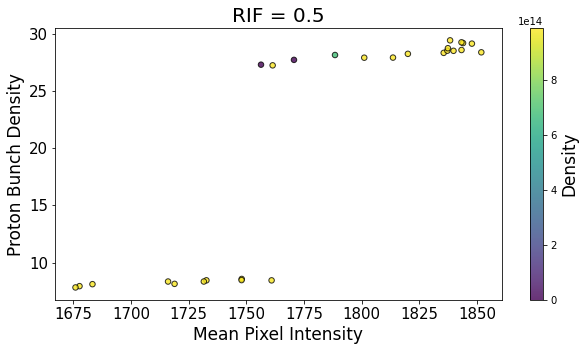

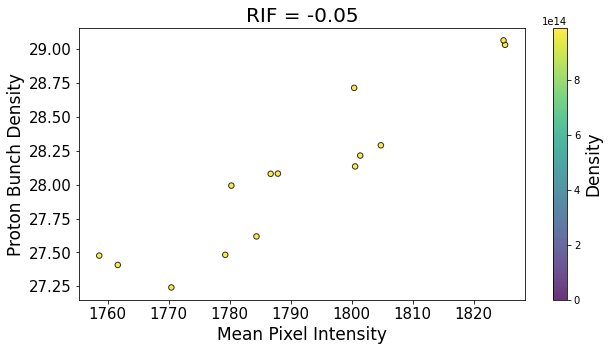

In [22]:
for rif, data in rif_data.items():
    fig, ax = plt.subplots(figsize=(10, 5))  # Create a new figure for each RIF
    sc = ax.scatter(data['fit_parameters'], data['proton_count'], s=30,
                    c=data['density'], cmap='viridis', edgecolors='k', alpha=0.8,vmin=0,vmax=np.max(data['density']))

    # Add colorbar to indicate density levels
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Density',fontsize=17)
    cbar.ax.tick_params(labelsize=10)
    
    ax.set_title(f'RIF = {round(rif-1121740.74,4)}', fontsize=20)
    ax.set_xlabel('Mean Pixel Intensity', fontsize=17)
    ax.set_ylabel('Proton Bunch Density', fontsize=17)
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    #plt.savefig(r'C:\Users\bethx\OneDrive\Documents\UCL_Masters\Research_Project\powerpoint_rif_04_05'{round(rif-1121740.74,4)}'.png')
    plt.show()  # Show each plot separately

1


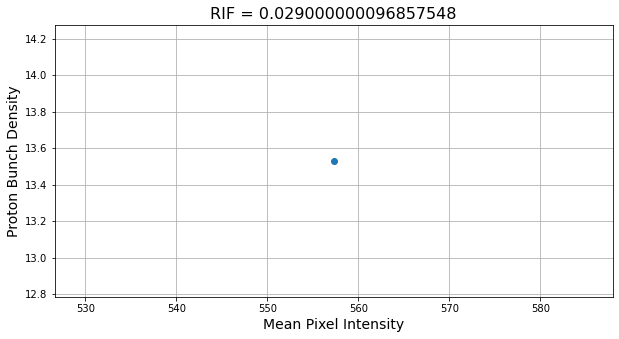

389


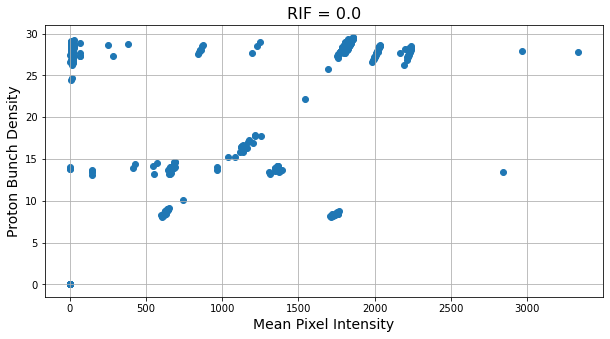

39


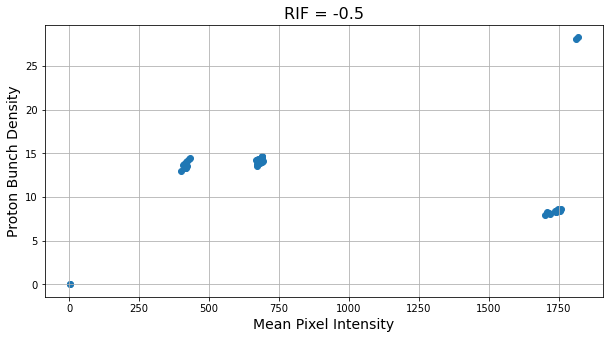

79


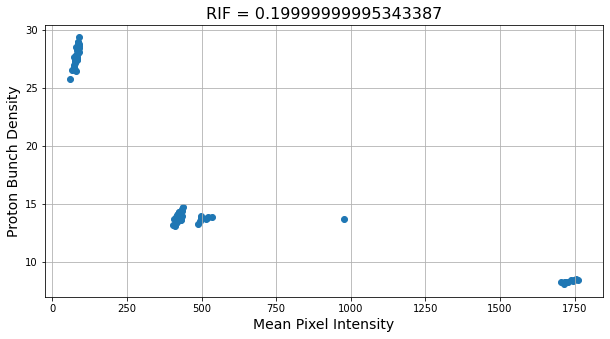

92


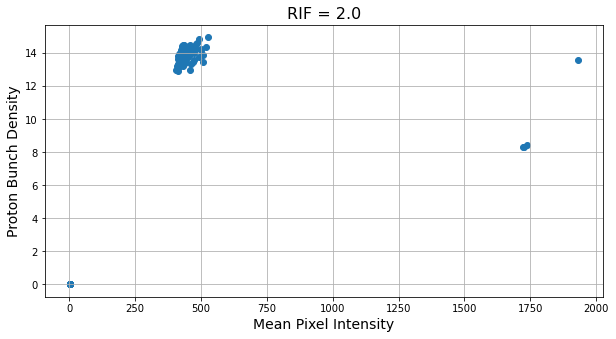

34


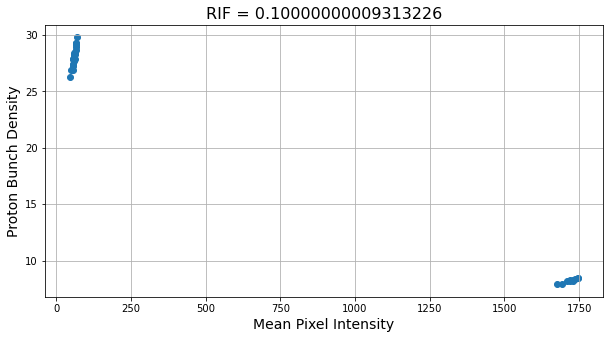

32


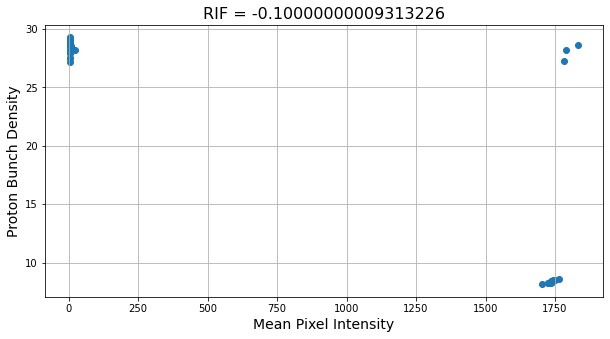

2


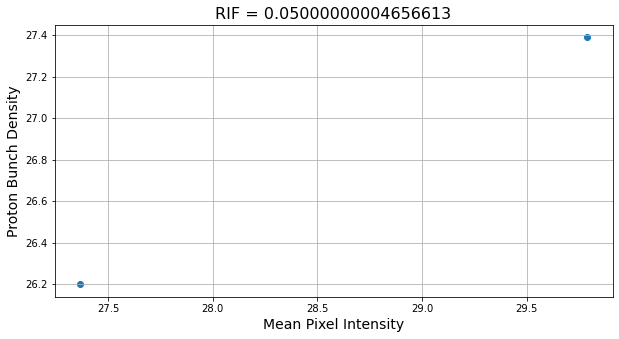

2


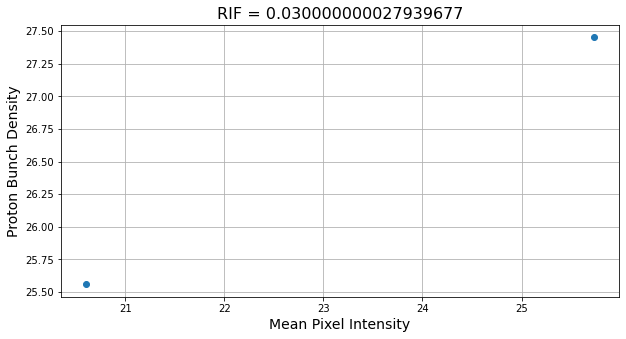

1


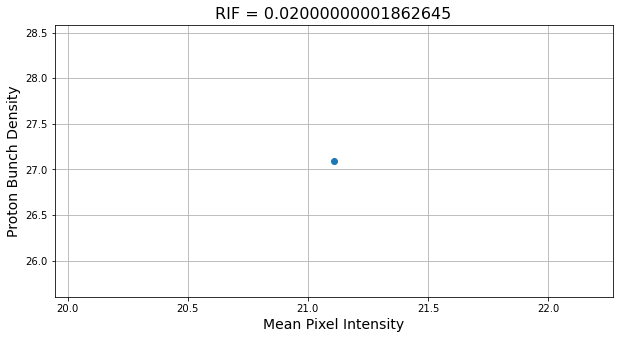

2


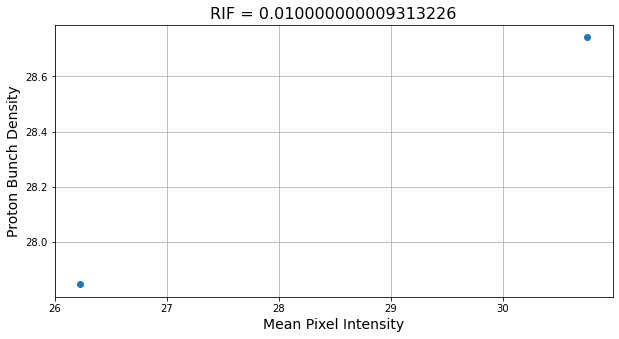

2


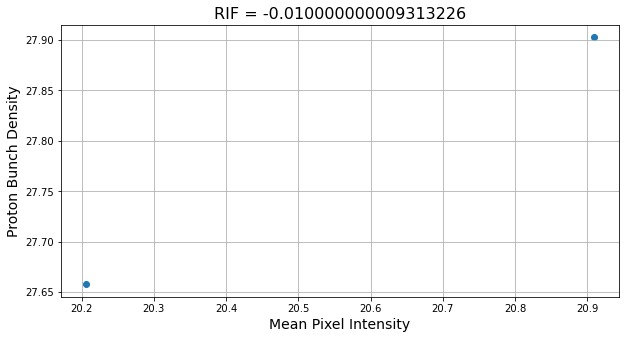

2


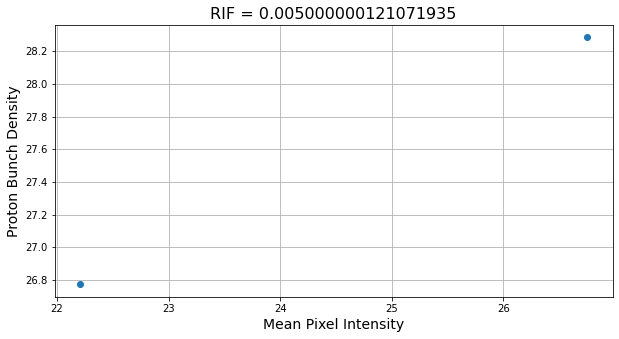

1


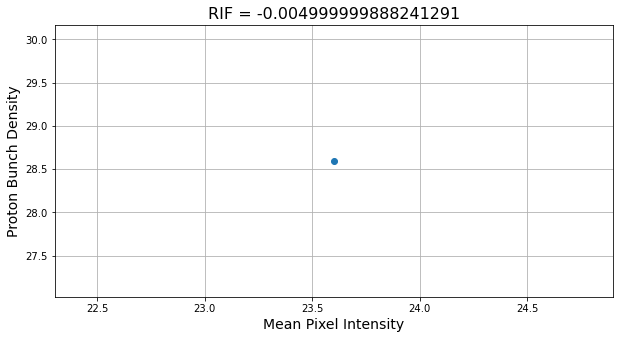

19


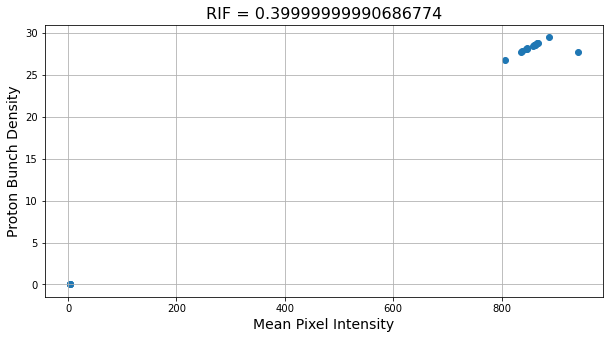

36


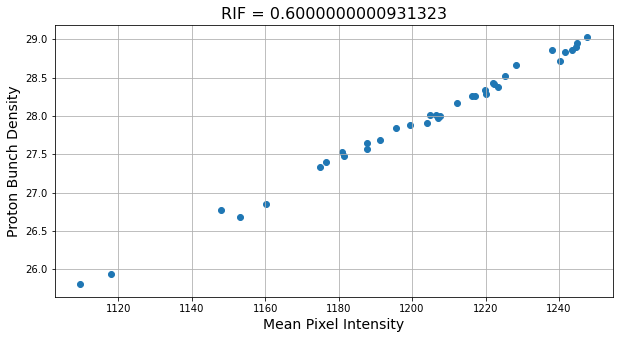

27


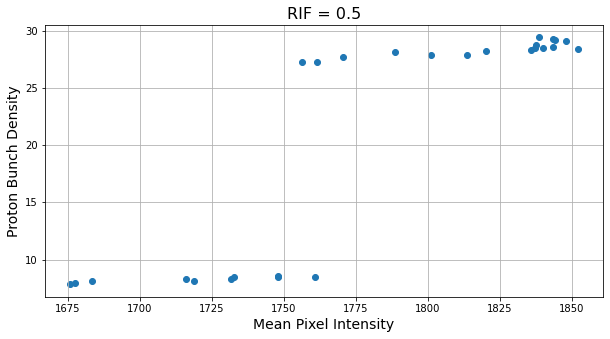

14


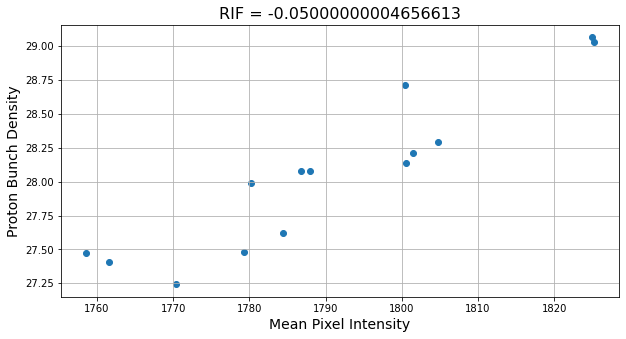

In [82]:
for rif, data in rif_data.items():
    fig, ax = plt.subplots(figsize=(10, 5))  # Create a new figure for each RIF
    ax.scatter(data['fit_parameters'], data['proton_count'])
    print(len(data['fit_parameters']))
    
    #a,b = np.polyfit(data['fit_parameters'], data['proton_count'],1)
    #ax.plot(data['fit_parameters'],data['fit_parameters']*a+b)
    
    ax.set_title(f'RIF = {rif-1121740.74}', fontsize=16)
    ax.set_xlabel('Mean Pixel Intensity', fontsize=14)
    ax.set_ylabel('Proton Bunch Density', fontsize=14)
    ax.grid()
    
    plt.show()  # Show each plot separately

Text(0, 0.5, 'Proton Bunch Density')

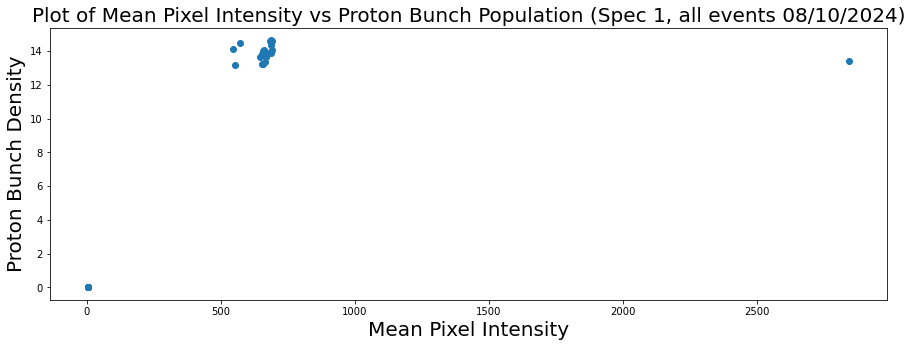

In [18]:
fit_parameters = []
proton_count = []

fig,ax1 = plt.subplots(1,figsize=(15,5))
files = os.listdir('/eos/experiment/awake/event_data/'+'2024/10/08')

for i in np.arange(0,50,1):
    
    files,data,protons,rif = load_data('2024/10/08',i,1)
    bg_sensor = subtract_sensor('2024/10/08',i,1,3.78126279)
    w_median_filter = ski.filters.median(bg_sensor, footprint=disk(4))
    
    if rif == 1121740.74:
        
        fit_parameters.append(np.mean(w_median_filter))
        proton_count.append(protons)
    
ax1.scatter(fit_parameters,proton_count)
ax1.set_title('Plot of Mean Pixel Intensity vs Proton Bunch Population (Spec 1, RIF = 0ps)',fontsize=20)
ax1.set_xlabel('Mean Pixel Intensity',fontsize=20)
ax1.set_ylabel('Proton Bunch Density',fontsize=20)

Text(0, 0.5, 'Proton Bunch Density')

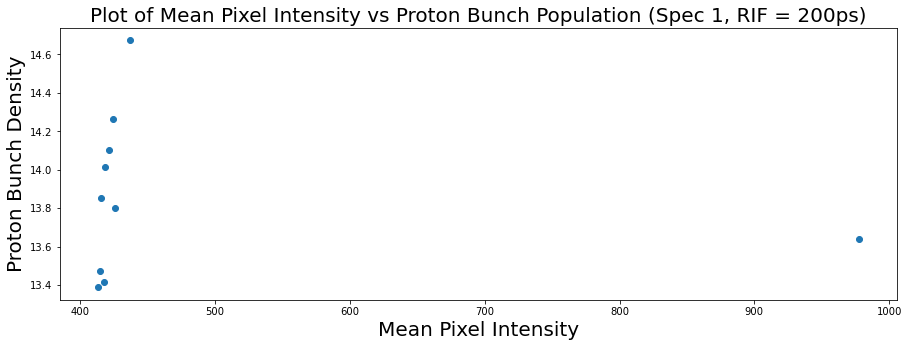

In [19]:
fit_parameters = []
proton_count = []

fig,ax1 = plt.subplots(1,figsize=(15,5))
files = os.listdir('/eos/experiment/awake/event_data/'+'2024/10/08')

for i in np.arange(0,50,1):
    
    files,data,protons,rif = load_data('2024/10/08',i,1)
    bg_sensor = subtract_sensor('2024/10/08',i,1,3.78126279)
    w_median_filter = ski.filters.median(bg_sensor, footprint=disk(4))
    
    if rif == 1121740.94:
        
        fit_parameters.append(np.mean(w_median_filter))
        proton_count.append(protons)
    
ax1.scatter(fit_parameters,proton_count)
ax1.set_title('Plot of Mean Pixel Intensity vs Proton Bunch Population (Spec 1, RIF = 200ps)',fontsize=20)
ax1.set_xlabel('Mean Pixel Intensity',fontsize=20)
ax1.set_ylabel('Proton Bunch Density',fontsize=20)

(400.0, 450.0)

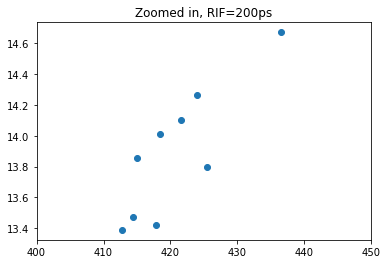

In [23]:
plt.scatter(fit_parameters,proton_count)
plt.title('Zoomed in, RIF=200ps')
plt.xlim(400,450)

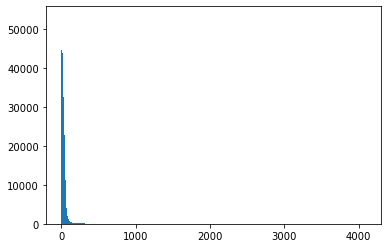

In [52]:
counts, bins, patches = plt.hist(data.ravel(),4095,[1,4095], density = False)    

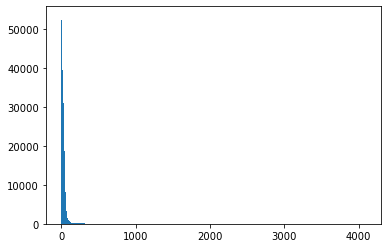

In [53]:
counts, bins, patches = plt.hist(bg_sensor.ravel(),4095,[1,4095], density = False)    

(0.0, 100.0)

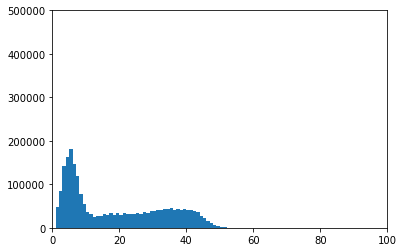

In [57]:
counts, bins, patches = plt.hist(w_median_filter.ravel(),4095,[1,4095], density = False)    
plt.ylim(0,500000)
plt.xlim(0,100)

In [13]:
# function to fit gaussian (not normalised)
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

Text(0, 0.5, 'Proton Bunch Density')

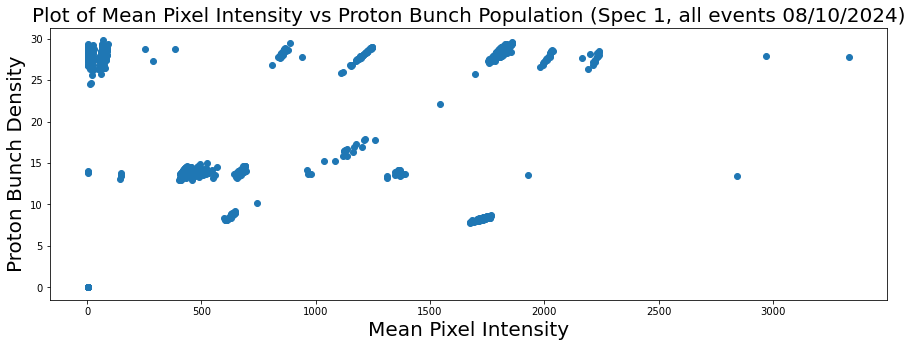

In [79]:
fit_parameters = []
proton_count = []

fig,ax1 = plt.subplots(1,figsize=(15,5))
files = os.listdir('/eos/experiment/awake/event_data/'+'2024/10/08')

for i in np.arange(0,len(files),1):
    
    files,data,protons = load_data('2024/10/08',i,1)
    bg_sensor = subtract_sensor('2024/10/08',i,1,3.78126279)
    w_median_filter = ski.filters.median(bg_sensor, footprint=disk(4))
    
    fit_parameters.append(np.mean(w_median_filter))
    proton_count.append(protons)

    
ax1.scatter(fit_parameters,proton_count)
ax1.set_title('Plot of Mean Pixel Intensity vs Proton Bunch Population (Spec 1, all events 08/10/2024)',fontsize=20)
ax1.set_xlabel('Mean Pixel Intensity',fontsize=20)
ax1.set_ylabel('Proton Bunch Density',fontsize=20)

(400.0, 1000.0)

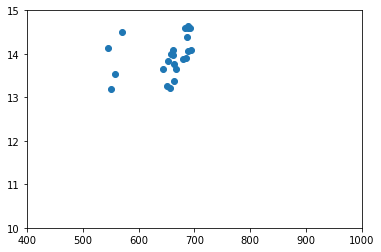

In [63]:
plt.scatter(fit_parameters,proton_count)
plt.ylim(10,15)

In [65]:
#Load in Data function
def load_data_off_screen(date,event_no,spectro_no):
    
    files = os.listdir('/eos/experiment/awake/event_data/'+date)
    f = h5py.File('/eos/experiment/awake/event_data/'+date+'/'+files[event_no],'r')
    data = f['AwakeEventData'][f'TCC4.SPECTRO'+str(spectro_no)+'.DigiCam']['ExtractionImage']['image2D'][1100:1200]
    protons= f['AwakeEventData']['TT41.BCTF.412340']['CaptureAcquisition']['totalIntensity'][0]
    
    return files, data, protons

In [66]:
## simple function to load in and plot spectrometer data
def subtract_sensor_off_screen(date,event_no,spectro_no,mean):
    
    file = os.listdir('/eos/experiment/awake/event_data/'+date)
    f = h5py.File('/eos/experiment/awake/event_data/'+date+'/'+files[event_no],'r')
    
    fig = np.array((f['AwakeEventData'][f'TCC4.SPECTRO'+str(spectro_no)+'.DigiCam']['ExtractionImage']['image2D'][1100:1200]))-mean
    
    return fig

Text(0, 0.5, 'Proton bunch population')

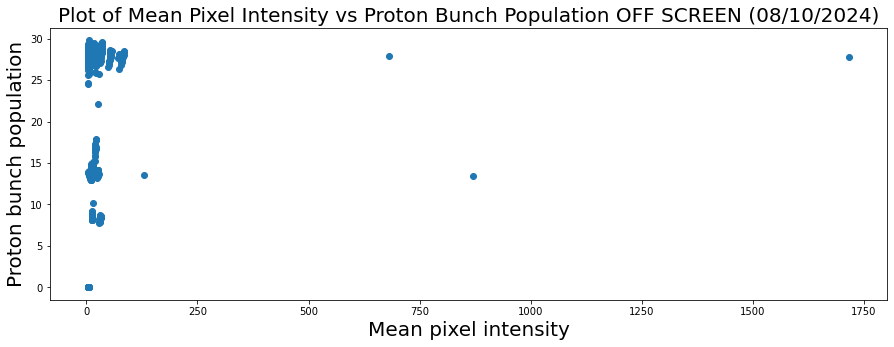

In [87]:
fit_parameters = []
proton_count = []

fig,ax1 = plt.subplots(1,figsize=(15,5))
files = os.listdir('/eos/experiment/awake/event_data/'+'2024/10/08')

for i in np.arange(0,len(files),1):
    
    files,data,protons = load_data_off_screen('2024/10/08',i,1)
    bg_sensor = subtract_sensor_off_screen('2024/10/08',i,1,3.78126279)
    w_median_filter = ski.filters.median(bg_sensor, footprint=disk(4))
    
    fit_parameters.append(np.mean(w_median_filter))
    proton_count.append(protons)

    
ax1.scatter(fit_parameters,proton_count)
ax1.set_title('Plot of Mean Pixel Intensity vs Proton Bunch Population OFF SCREEN (08/10/2024)',fontsize=20)
ax1.set_xlabel('Mean pixel intensity',fontsize=20)
ax1.set_ylabel('Proton bunch population',fontsize=20)

(0.0, 100.0)

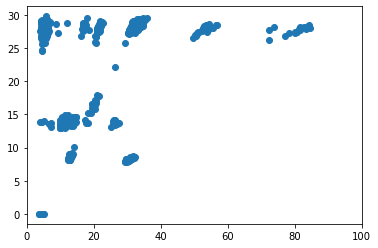

In [88]:
plt.scatter(fit_parameters,proton_count)
plt.xlim(0,100)

(0.0, 25.0)

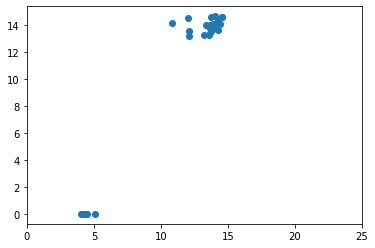

In [74]:
plt.scatter(fit_parameters,proton_count)
plt.xlim(0,25)

Text(0, 0.5, 'Proton Bunch population')

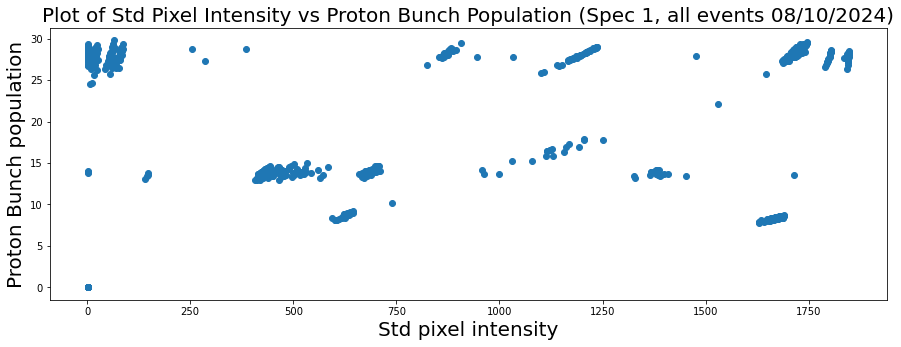

In [78]:
fit_parameters = []
proton_count = []
stds = []

fig,ax1 = plt.subplots(1,figsize=(15,5))
files = os.listdir('/eos/experiment/awake/event_data/'+'2024/10/08')

for i in np.arange(0,len(files),1):
    
    files,data,protons = load_data('2024/10/08',i,1)
    bg_sensor = subtract_sensor('2024/10/08',i,1,3.78126279)
    w_median_filter = ski.filters.median(bg_sensor, footprint=disk(4))
    
    fit_parameters.append(np.mean(w_median_filter))
    stds.append(np.std(w_median_filter))
    proton_count.append(protons)

    
ax1.scatter(stds,proton_count)
ax1.set_title('Plot of Std Pixel Intensity vs Proton Bunch Population (Spec 1, all events 08/10/2024)',fontsize=20)
ax1.set_xlabel('Std pixel intensity',fontsize=20)
ax1.set_ylabel('Proton Bunch population',fontsize=20)

Text(0, 0.5, 'Proton Bunch population')

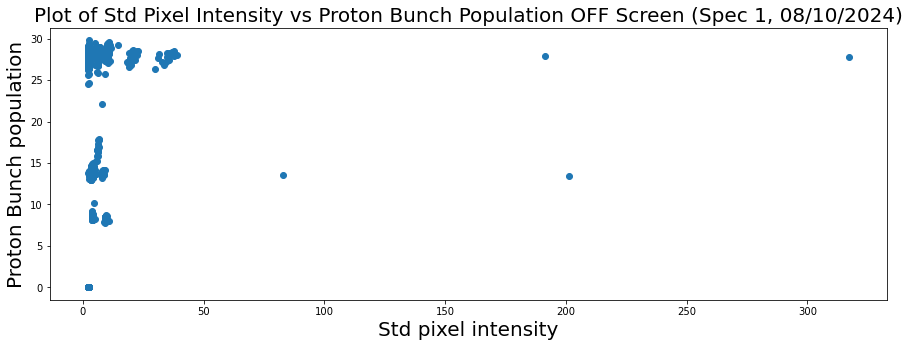

In [84]:
fit_parameters = []
proton_count = []
stds = []

fig,ax1 = plt.subplots(1,figsize=(15,5))
files = os.listdir('/eos/experiment/awake/event_data/'+'2024/10/08')

for i in np.arange(0,len(files),1):
    
    files,data,protons = load_data_off_screen('2024/10/08',i,1)
    bg_sensor = subtract_sensor_off_screen('2024/10/08',i,1,3.78126279)
    w_median_filter = ski.filters.median(bg_sensor, footprint=disk(4))
    
    fit_parameters.append(np.mean(w_median_filter))
    stds.append(np.std(w_median_filter))
    proton_count.append(protons)

    
ax1.scatter(stds,proton_count)
ax1.set_title('Plot of Std Pixel Intensity vs Proton Bunch Population OFF Screen (Spec 1, 08/10/2024)',fontsize=20)
ax1.set_xlabel('Std pixel intensity',fontsize=20)
ax1.set_ylabel('Proton Bunch population',fontsize=20)

Text(0, 0.5, 'Proton Bunch Density')

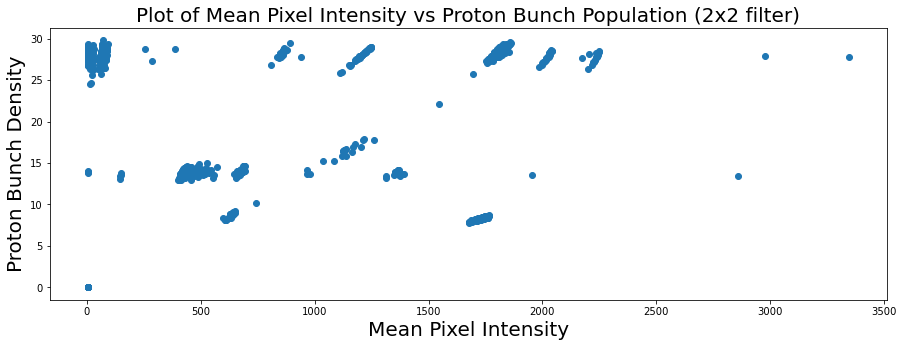

In [85]:
fit_parameters = []
proton_count = []

fig,ax1 = plt.subplots(1,figsize=(15,5))
files = os.listdir('/eos/experiment/awake/event_data/'+'2024/10/08')

for i in np.arange(0,len(files),1):
    
    files,data,protons = load_data('2024/10/08',i,1)
    bg_sensor = subtract_sensor('2024/10/08',i,1,3.78126279)
    w_median_filter = ski.filters.median(bg_sensor, footprint=disk(2))
    
    fit_parameters.append(np.mean(w_median_filter))
    proton_count.append(protons)

    
ax1.scatter(fit_parameters,proton_count)
ax1.set_title('Plot of Mean Pixel Intensity vs Proton Bunch Population (2x2 filter)',fontsize=20)
ax1.set_xlabel('Mean Pixel Intensity',fontsize=20)
ax1.set_ylabel('Proton Bunch Density',fontsize=20)

Text(0, 0.5, 'Proton Bunch Density')

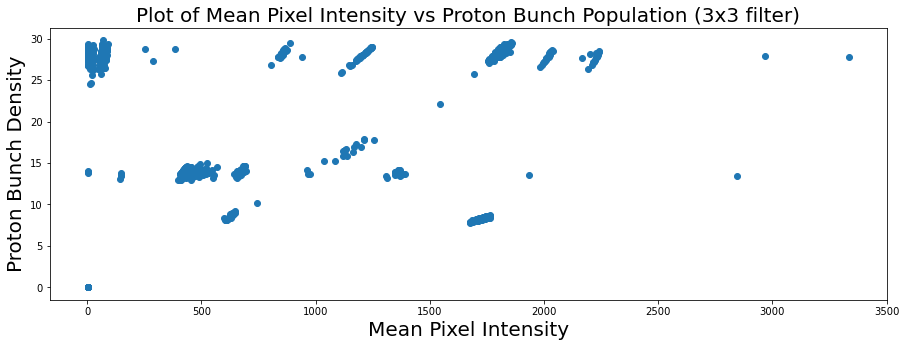

In [86]:
fit_parameters = []
proton_count = []

fig,ax1 = plt.subplots(1,figsize=(15,5))
files = os.listdir('/eos/experiment/awake/event_data/'+'2024/10/08')

for i in np.arange(0,len(files),1):
    
    files,data,protons = load_data('2024/10/08',i,1)
    bg_sensor = subtract_sensor('2024/10/08',i,1,3.78126279)
    w_median_filter = ski.filters.median(bg_sensor, footprint=disk(3))
    
    fit_parameters.append(np.mean(w_median_filter))
    proton_count.append(protons)

    
ax1.scatter(fit_parameters,proton_count)
ax1.set_title('Plot of Mean Pixel Intensity vs Proton Bunch Population (3x3 filter)',fontsize=20)
ax1.set_xlabel('Mean Pixel Intensity',fontsize=20)
ax1.set_ylabel('Proton Bunch Density',fontsize=20)